In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [52]:
df = pd.read_csv('data1.csv')

In [53]:
print(df.shape)
df.head()

(966, 18)


Year    FG%    3P%    2P%    FT%   TRB   AST  STL  BLK   TOV    PF    PTS  \
0  18-19  0.476  0.353  0.565  0.773  49.7  26.0  7.5  5.9  13.9  19.6  118.1   
1  18-19  0.491  0.385  0.557  0.801  46.2  29.4  7.6  6.4  14.3  21.4  117.7   
2  18-19  0.473  0.344  0.536  0.761  47.3  27.0  7.4  5.4  14.8  21.1  115.4   
3  18-19  0.471  0.359  0.529  0.771  47.8  26.9  7.4  5.3  14.9  21.3  115.2   
4  18-19  0.471  0.388  0.507  0.792  45.5  24.0  6.8  4.7  14.5  23.3  115.1   

    SRS   ORtg   DRtg  Attend./G     Win %  Playoff  
0  8.04  113.8  105.2    17602.0  0.731707        1  
1  6.42  115.9  109.5    19596.0  0.695122        1  
2 -1.10  111.4  112.6    16004.0  0.402439        0  
3  2.25  112.6  110.0    20447.0  0.621951        1  
4  1.09  112.4  111.5    17325.0  0.585366        1

In [54]:
df.corr()

/var/folders/1b/tmwzw42s41z26_pds323c6qw0000gn/T/ipykernel_35227/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


FG%       3P%       2P%       FT%       TRB       AST  \
FG%        1.000000  0.328088  0.766250  0.209455  0.082484  0.636110   
3P%        0.328088  1.000000  0.320943  0.247911 -0.098158  0.129412   
2P%        0.766250  0.320943  1.000000  0.280172  0.267305  0.615064   
FT%        0.209455  0.247911  0.280172  1.000000 -0.016960  0.181601   
TRB        0.082484 -0.098158  0.267305 -0.016960  1.000000  0.311173   
AST        0.636110  0.129412  0.615064  0.181601  0.311173  1.000000   
STL        0.101382 -0.218578 -0.026045 -0.155344 -0.051135  0.249095   
BLK        0.129866 -0.081761 -0.002831 -0.112860  0.236238  0.125837   
TOV       -0.053733 -0.313262 -0.224332 -0.356997 -0.013821 -0.013405   
PF        -0.083173 -0.185962 -0.338999 -0.211252 -0.203822 -0.093774   
PTS        0.640595  0.241577  0.846800  0.351904  0.504709  0.661464   
SRS        0.567638  0.409902  0.422327  0.169063  0.258942  0.334918   
ORtg       0.763448  0.461830  0.842071  0.402795  0.296467  0.552762   
DRtg       0.121219 -0.012401  0.379123  0.225344  0.001790  0.179548   
Attend./G  0.063060  0.118447 -0.026985 -0.013740 -0.067445 -0.034837   
Win %      0.583680  0.409116  0.432765  0.182865  0.242977  0.355107   
Playoff    0.424562  0.257616  0.318168  0.149783  0.181734  0.256260   

                STL       BLK       TOV        PF       PTS       SRS  \
FG%        0.101382  0.129866 -0.053733 -0.083173  0.640595  0.567638   
3P%       -0.218578 -0.081761 -0.313262 -0.185962  0.241577  0.409902   
2P%       -0.026045 -0.002831 -0.224332 -0.338999  0.846800  0.422327   
FT%       -0.155344 -0.112860 -0.356997 -0.211252  0.351904  0.169063   
TRB       -0.051135  0.236238 -0.013821 -0.203822  0.504709  0.258942   
AST        0.249095  0.125837 -0.013405 -0.093774  0.661464  0.334918   
STL        1.000000  0.072024  0.294359  0.268024  0.087986  0.145285   
BLK        0.072024  1.000000  0.154977  0.021671  0.020049  0.192443   
TOV        0.294359  0.154977  1.000000  0.528917 -0.194384 -0.321930   
PF         0.268024  0.021671  0.528917  1.000000 -0.216840 -0.181931   
PTS        0.087986  0.020049 -0.194384 -0.216840  1.000000  0.311729   
SRS        0.145285  0.192443 -0.321930 -0.181931  0.311729  1.000000   
ORtg      -0.020229 -0.003826 -0.414190 -0.277257  0.838427  0.619456   
DRtg      -0.194544 -0.230135 -0.042400 -0.071009  0.510792 -0.551731   
Attend./G -0.075515 -0.025493 -0.121264 -0.009340 -0.129423  0.248687   
Win %      0.109378  0.175408 -0.328355 -0.184527  0.330528  0.934523   
Playoff    0.158863  0.126385 -0.256276 -0.139203  0.224845  0.767826   

               ORtg      DRtg  Attend./G     Win %   Playoff  
FG%        0.763448  0.121219   0.063060  0.583680  0.424562  
3P%        0.461830 -0.012401   0.118447  0.409116  0.257616  
2P%        0.842071  0.379123  -0.026985  0.432765  0.318168  
FT%        0.402795  0.225344  -0.013740  0.182865  0.149783  
TRB        0.296467  0.001790  -0.067445  0.242977  0.181734  
AST        0.552762  0.179548  -0.034837  0.355107  0.256260  
STL       -0.020229 -0.194544  -0.075515  0.109378  0.158863  
BLK       -0.003826 -0.230135  -0.025493  0.175408  0.126385  
TOV       -0.414190 -0.042400  -0.121264 -0.328355 -0.256276  
PF        -0.277257 -0.071009  -0.009340 -0.184527 -0.139203  
PTS        0.838427  0.510792  -0.129423  0.330528  0.224845  
SRS        0.619456 -0.551731   0.248687  0.934523  0.767826  
ORtg       1.000000  0.307807   0.024834  0.621578  0.461153  
DRtg       0.307807  1.000000  -0.278644 -0.478255 -0.454620  
Attend./G  0.024834 -0.278644   1.000000  0.251376  0.201267  
Win %      0.621578 -0.478255   0.251376  1.000000  0.783162  
Playoff    0.461153 -0.454620   0.201267  0.783162  1.000000

In [55]:
df.shape

(966, 18)

Scatter plot of: FG% and 3P%


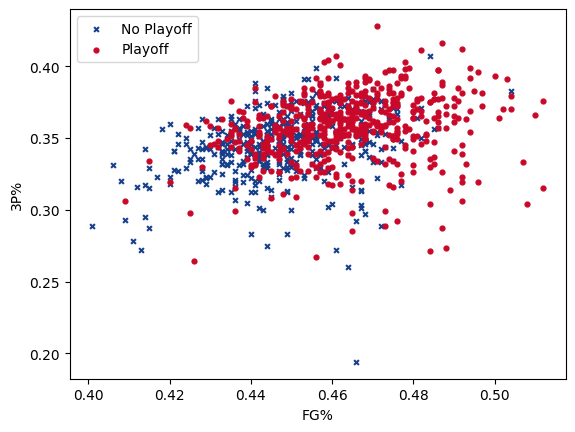

Scatter plot of: FG% and 2P%


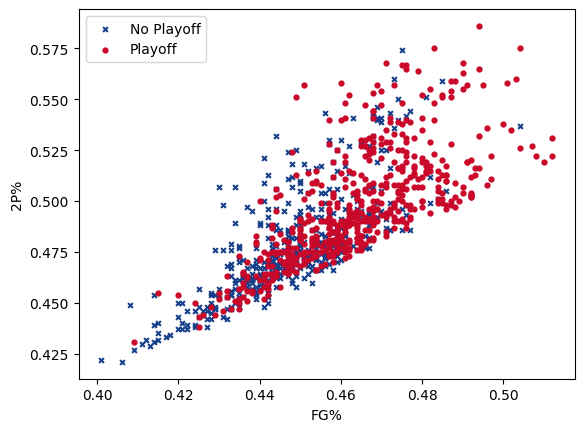

Scatter plot of: FG% and FT%


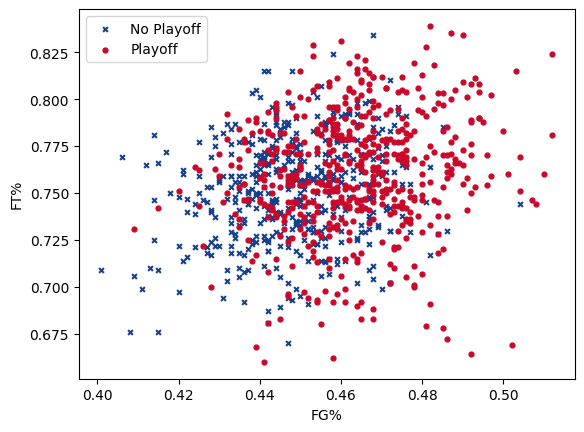

Scatter plot of: FG% and TRB


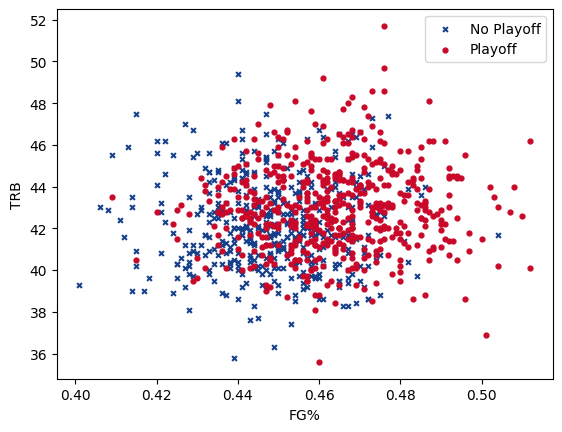

Scatter plot of: FG% and AST


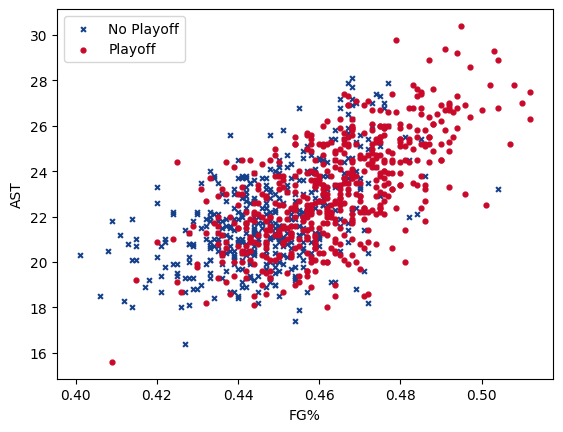

Scatter plot of: FG% and STL


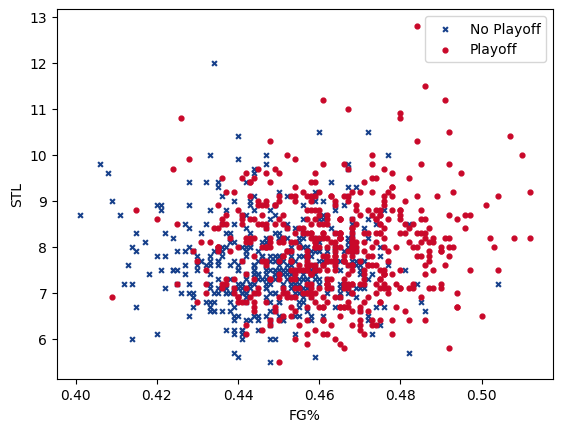

Scatter plot of: FG% and BLK


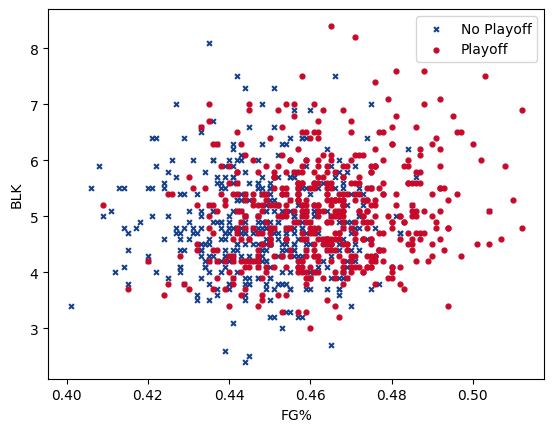

Scatter plot of: FG% and TOV


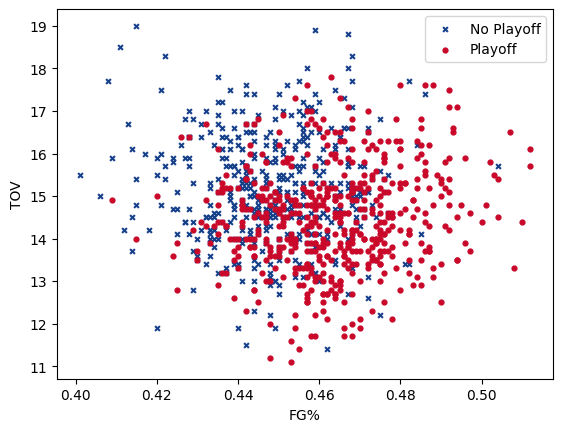

Scatter plot of: FG% and PF


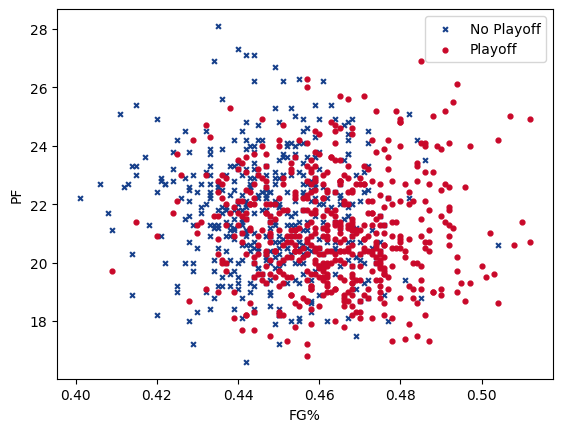

Scatter plot of: FG% and PTS


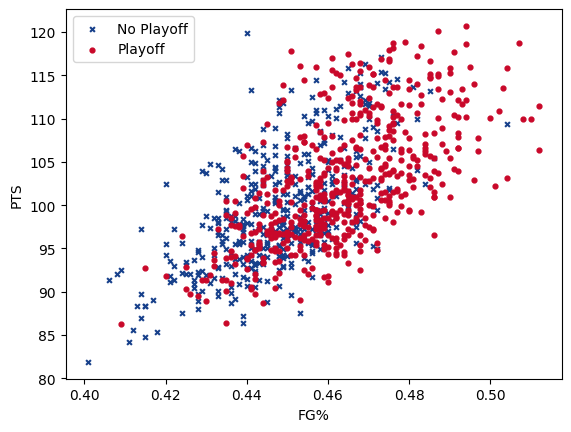

Scatter plot of: FG% and SRS


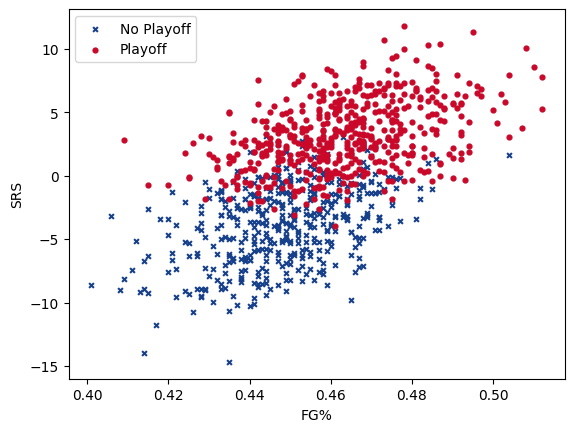

Scatter plot of: FG% and ORtg


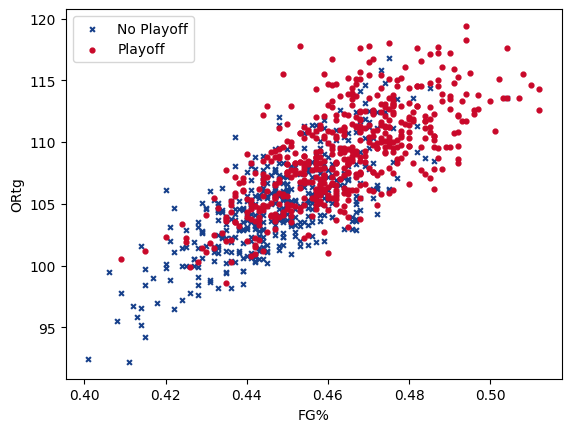

Scatter plot of: FG% and DRtg


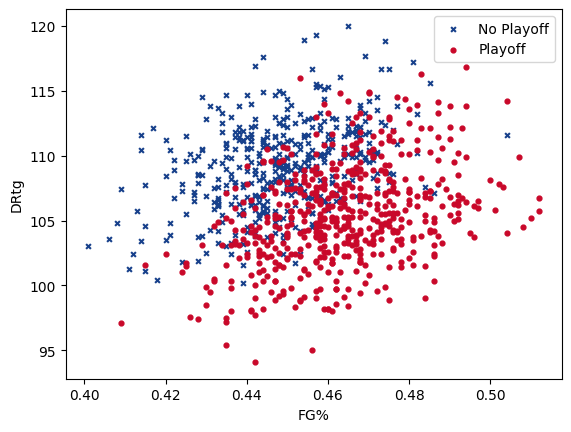

Scatter plot of: FG% and Attend./G


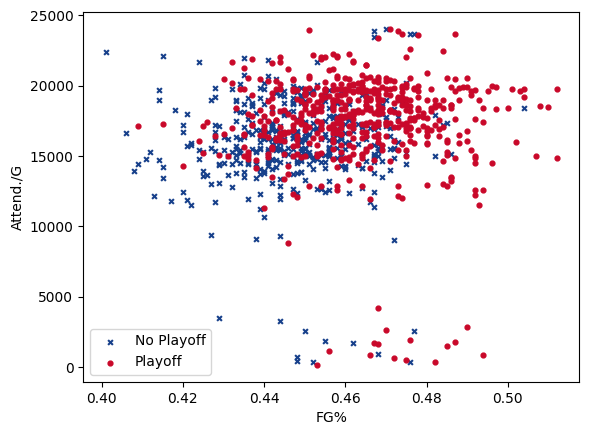

Scatter plot of: FG% and Win %


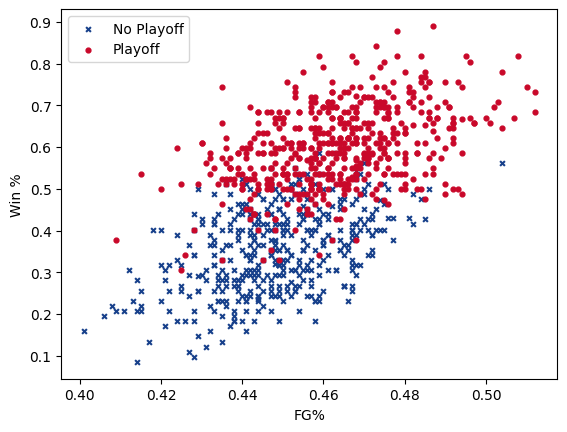

Scatter plot of: 3P% and 2P%


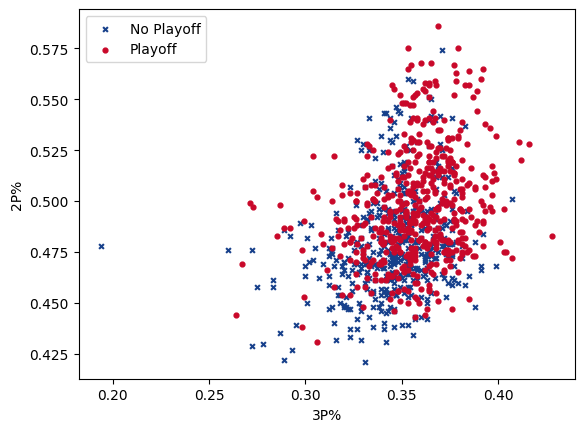

Scatter plot of: 3P% and FT%


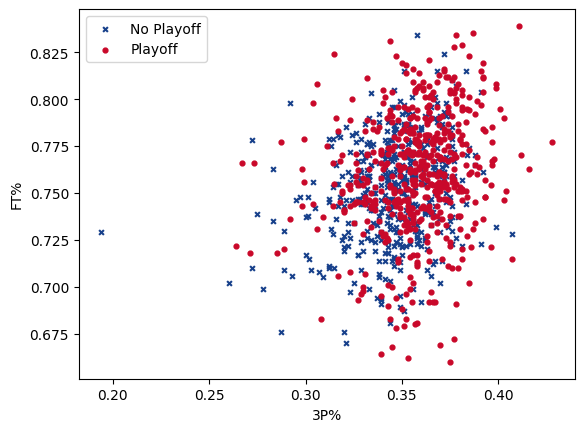

Scatter plot of: 3P% and TRB


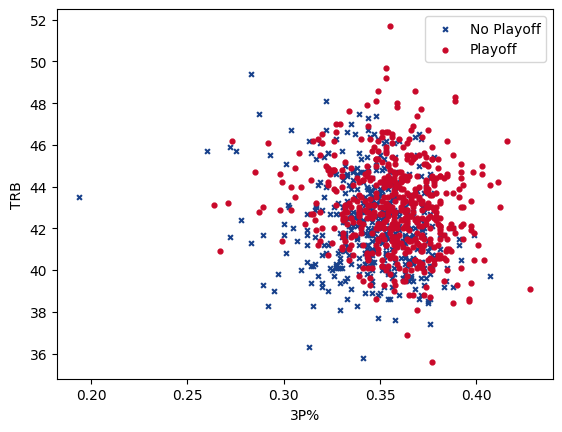

Scatter plot of: 3P% and AST


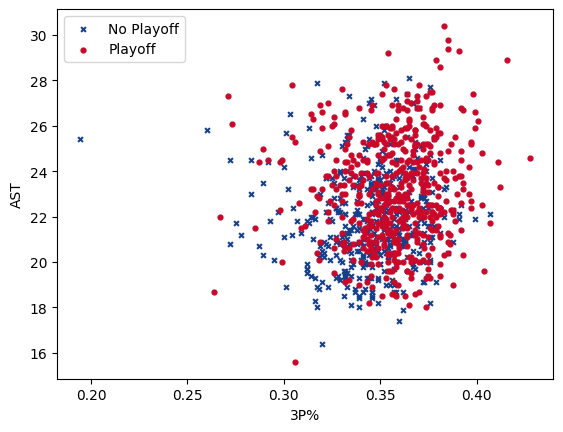

Scatter plot of: 3P% and STL


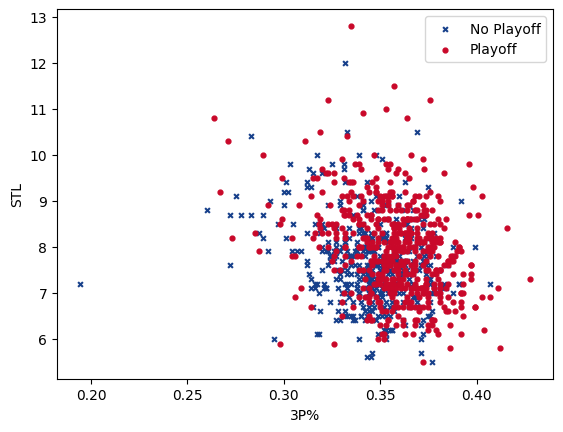

Scatter plot of: 3P% and BLK


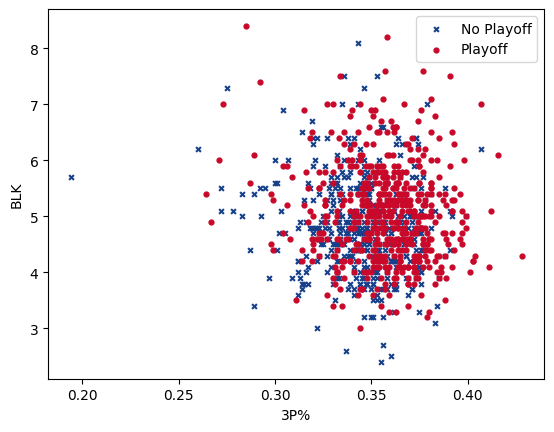

Scatter plot of: 3P% and TOV


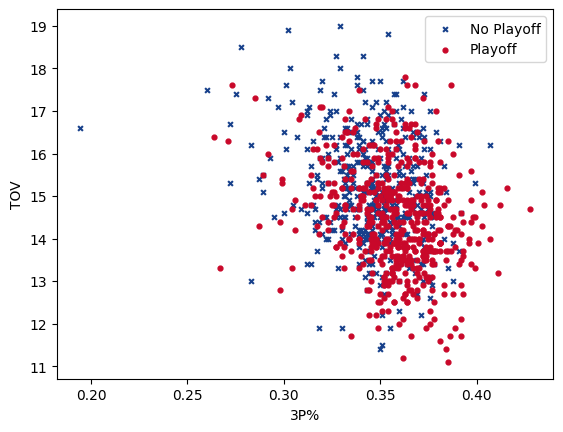

Scatter plot of: 3P% and PF


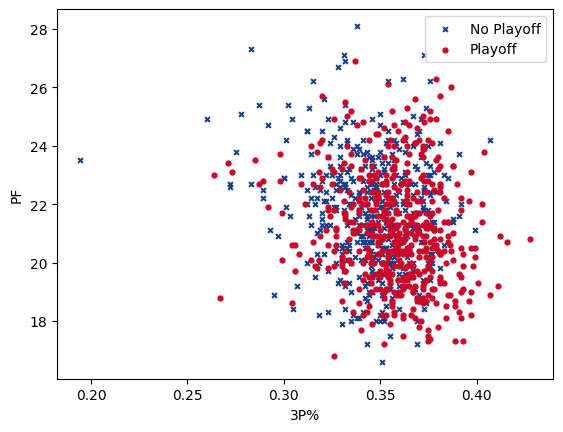

Scatter plot of: 3P% and PTS


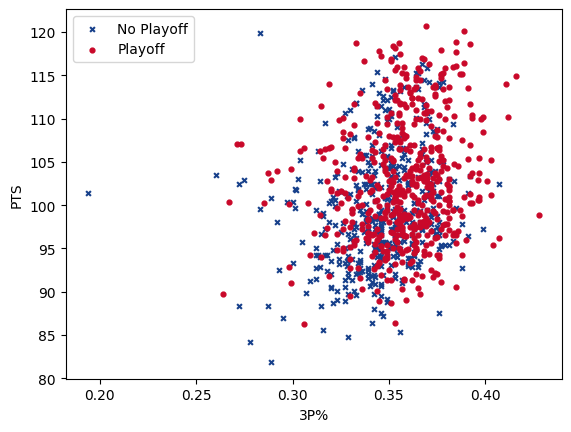

Scatter plot of: 3P% and SRS


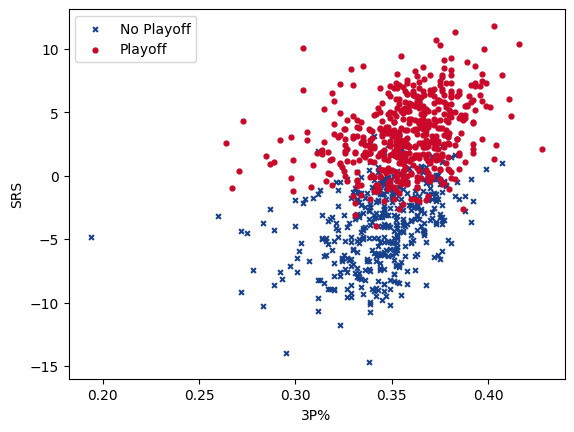

Scatter plot of: 3P% and ORtg


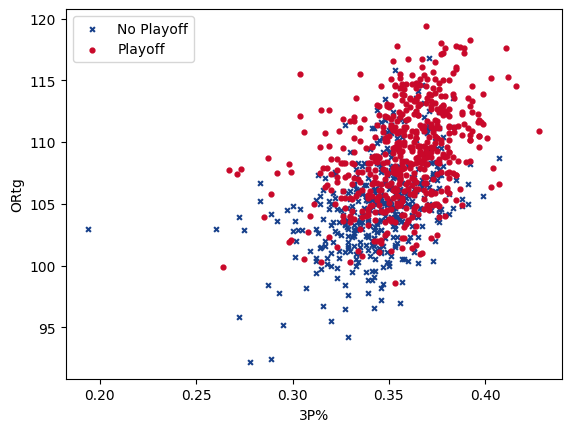

Scatter plot of: 3P% and DRtg


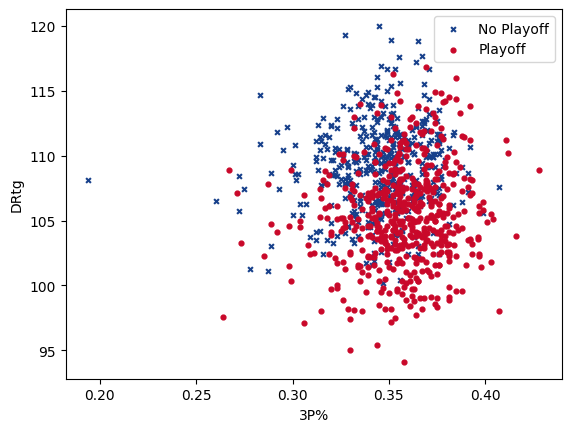

Scatter plot of: 3P% and Attend./G


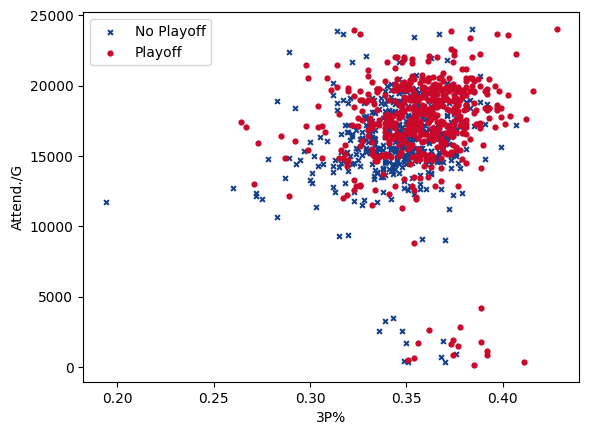

Scatter plot of: 3P% and Win %


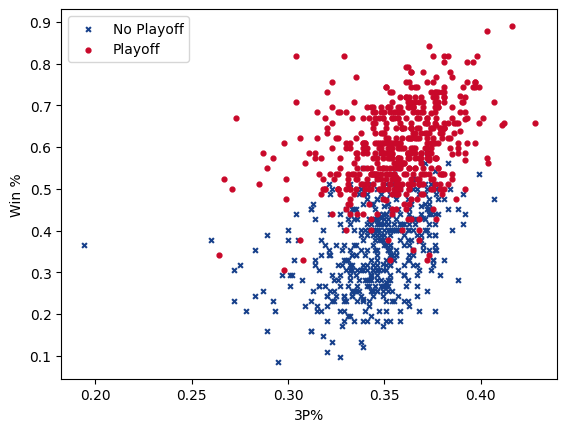

Scatter plot of: 2P% and FT%


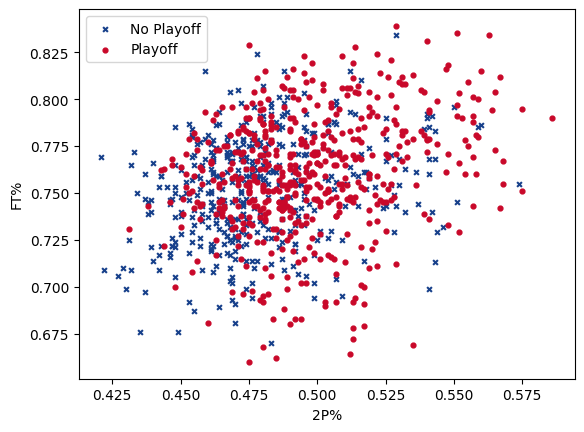

Scatter plot of: 2P% and TRB


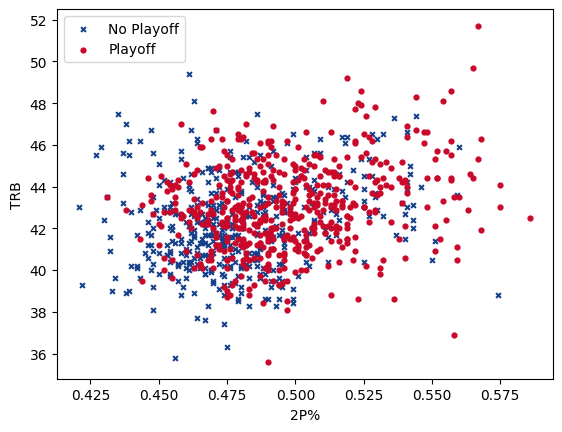

Scatter plot of: 2P% and AST


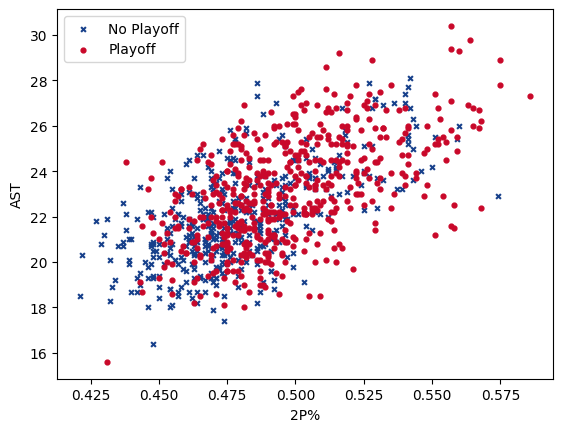

Scatter plot of: 2P% and STL


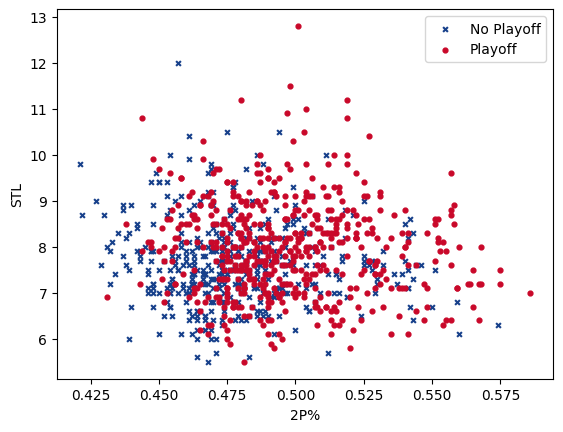

Scatter plot of: 2P% and BLK


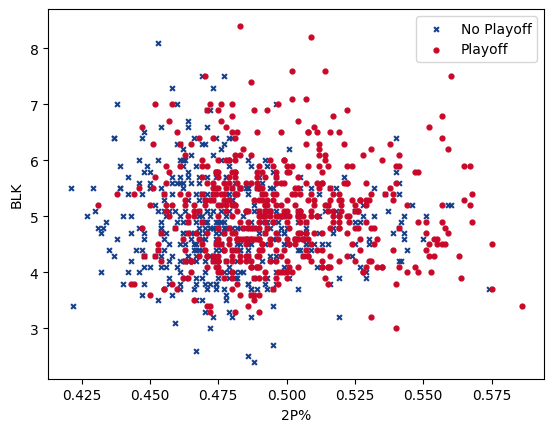

Scatter plot of: 2P% and TOV


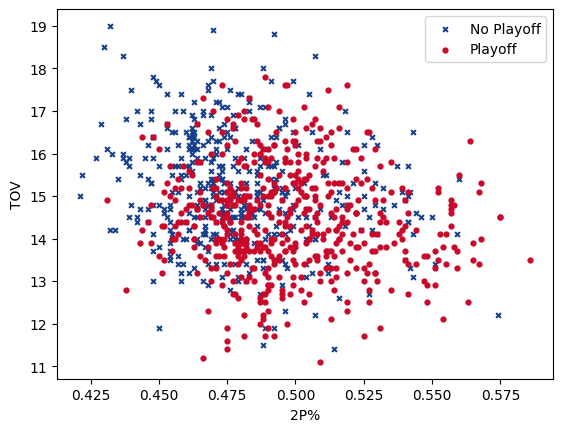

Scatter plot of: 2P% and PF


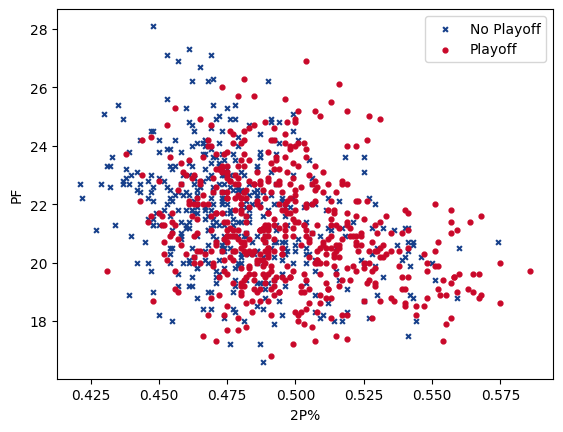

Scatter plot of: 2P% and PTS


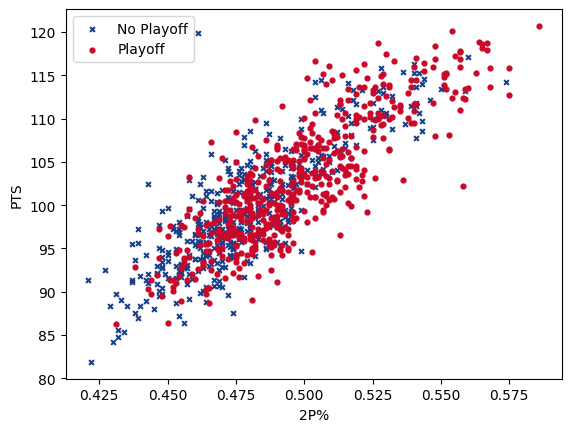

Scatter plot of: 2P% and SRS


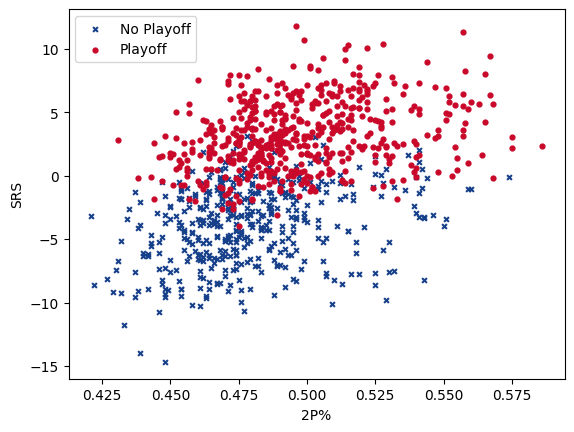

Scatter plot of: 2P% and ORtg


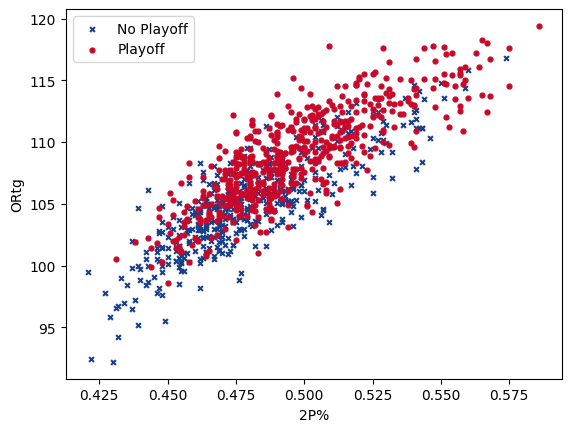

Scatter plot of: 2P% and DRtg


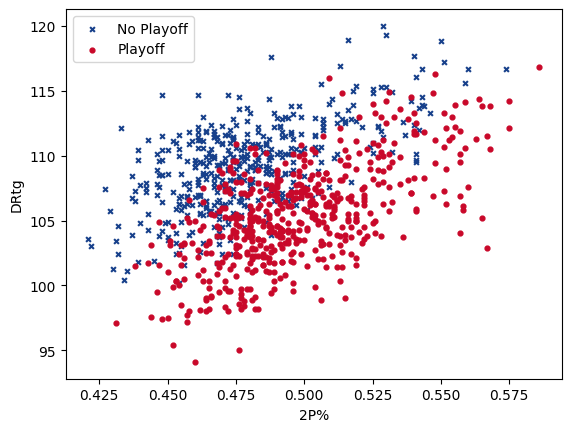

Scatter plot of: 2P% and Attend./G


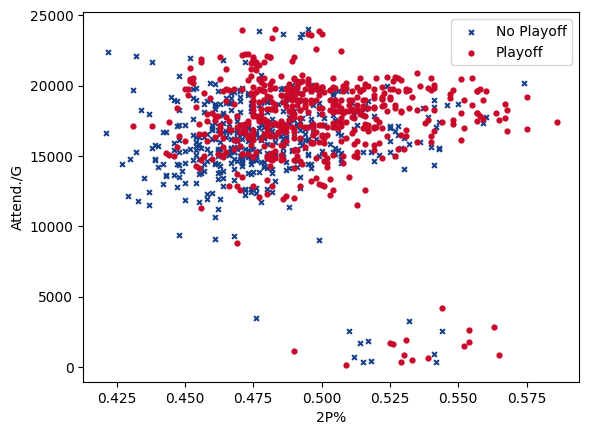

Scatter plot of: 2P% and Win %


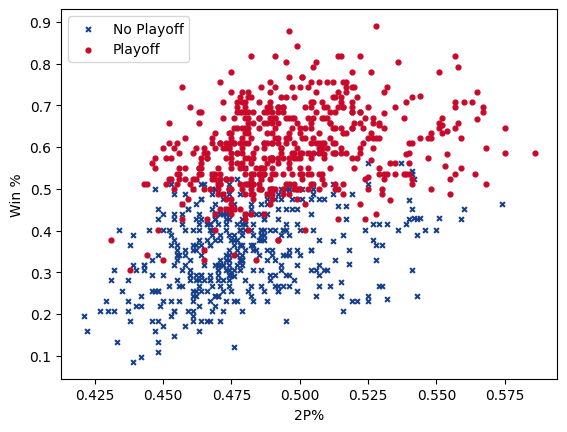

Scatter plot of: FT% and TRB


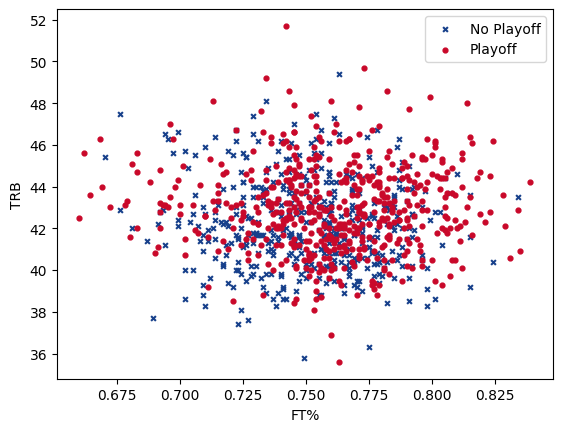

Scatter plot of: FT% and AST


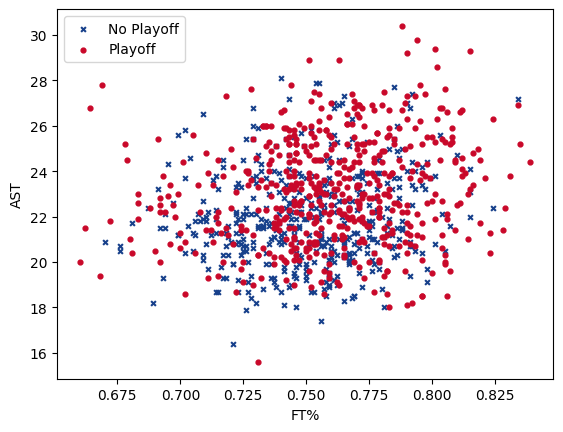

Scatter plot of: FT% and STL


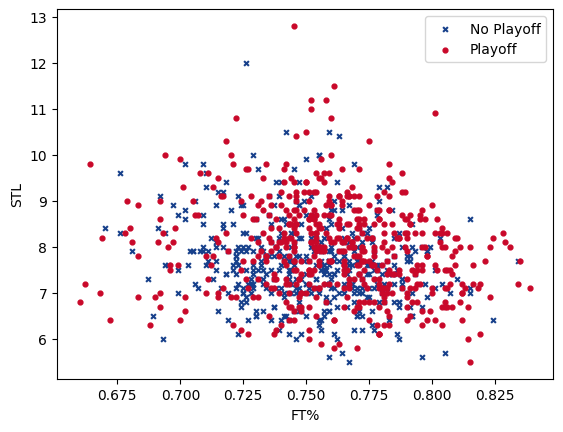

Scatter plot of: FT% and BLK


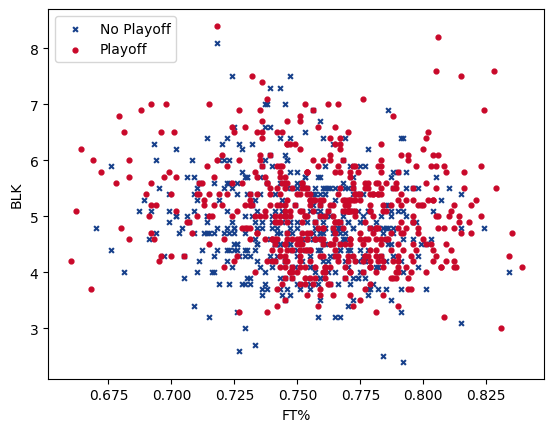

Scatter plot of: FT% and TOV


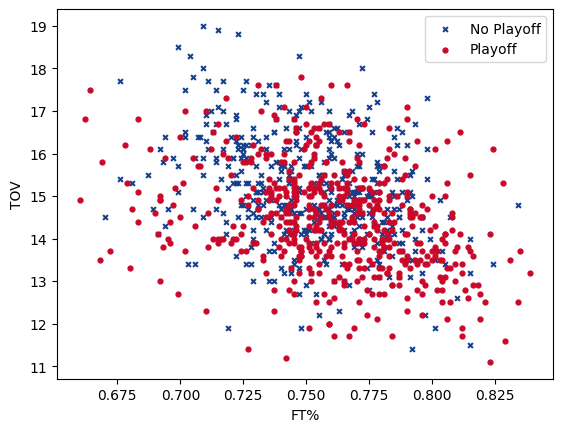

Scatter plot of: FT% and PF


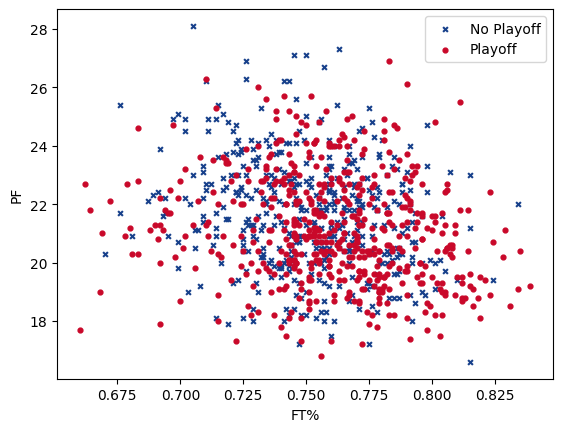

Scatter plot of: FT% and PTS


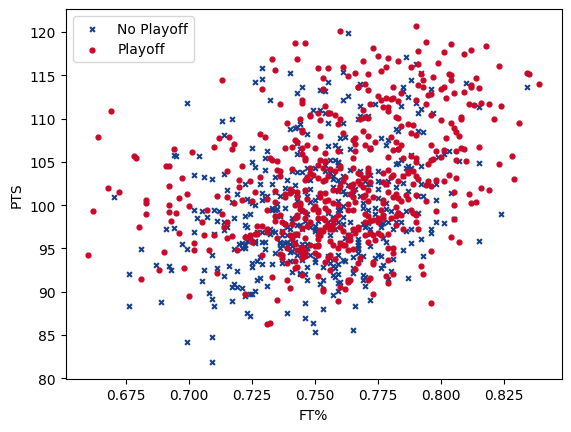

Scatter plot of: FT% and SRS


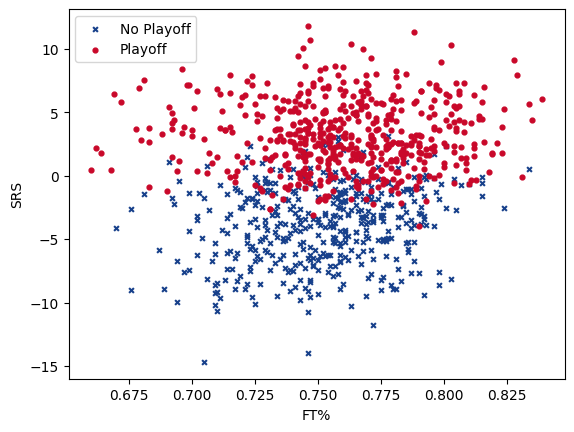

Scatter plot of: FT% and ORtg


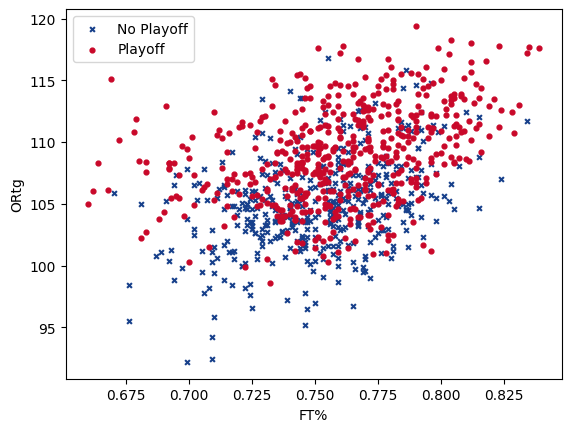

Scatter plot of: FT% and DRtg


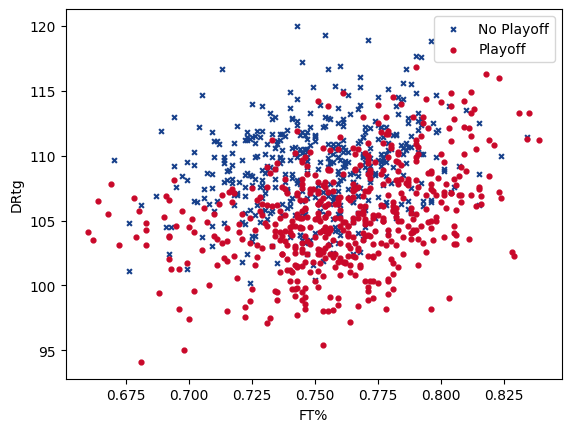

Scatter plot of: FT% and Attend./G


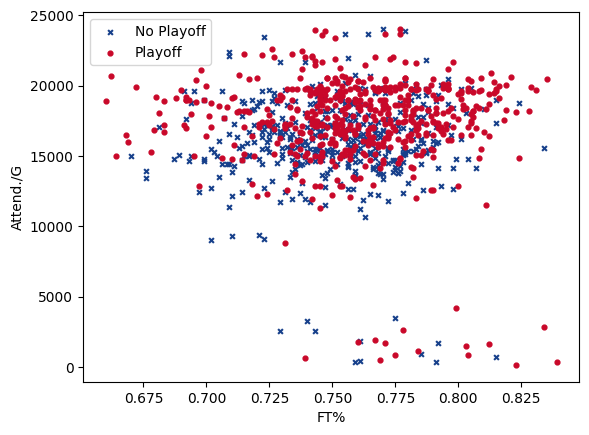

Scatter plot of: FT% and Win %


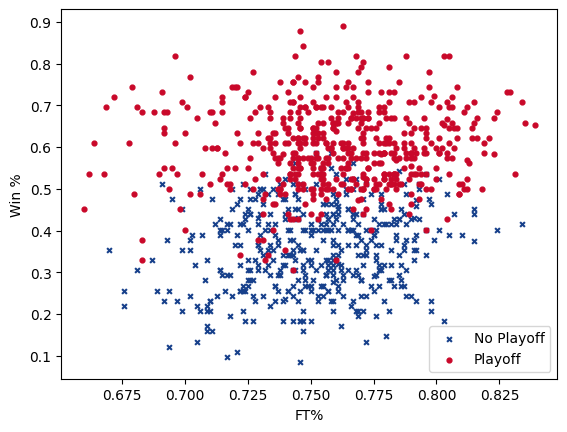

Scatter plot of: TRB and AST


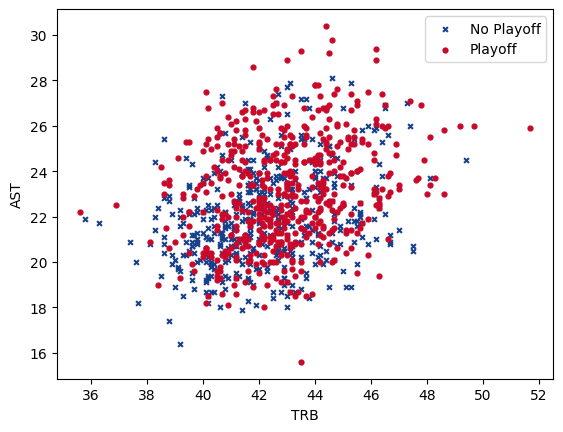

Scatter plot of: TRB and STL


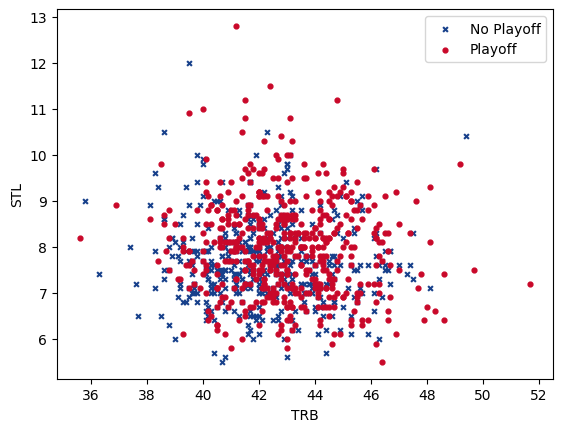

Scatter plot of: TRB and BLK


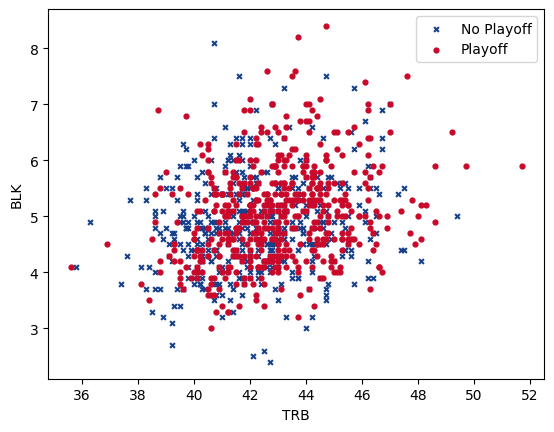

Scatter plot of: TRB and TOV


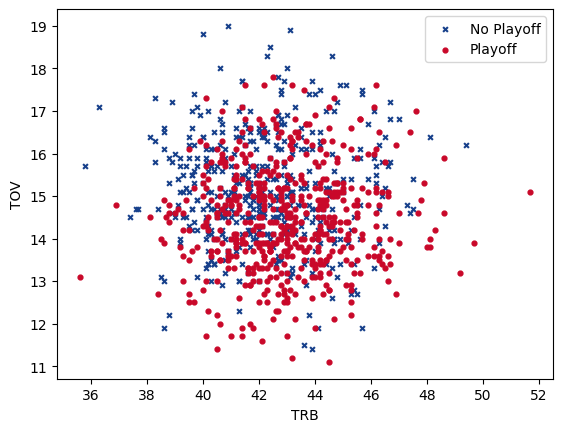

Scatter plot of: TRB and PF


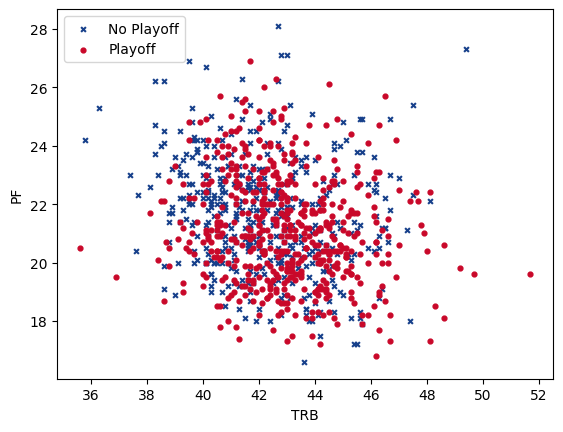

Scatter plot of: TRB and PTS


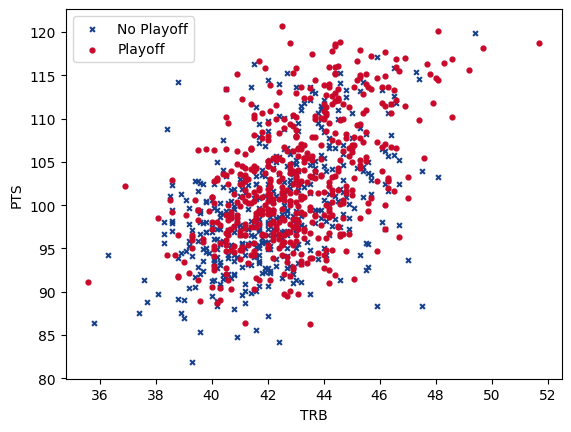

Scatter plot of: TRB and SRS


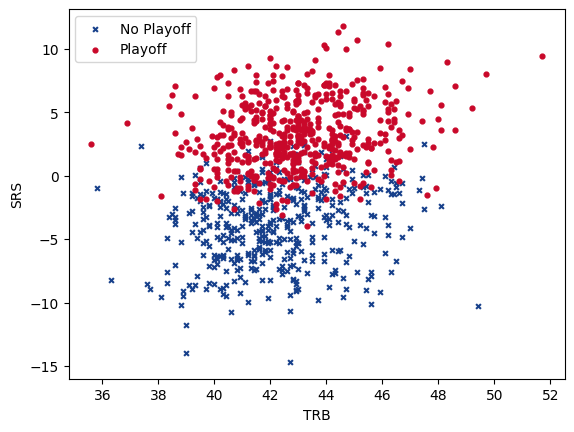

Scatter plot of: TRB and ORtg


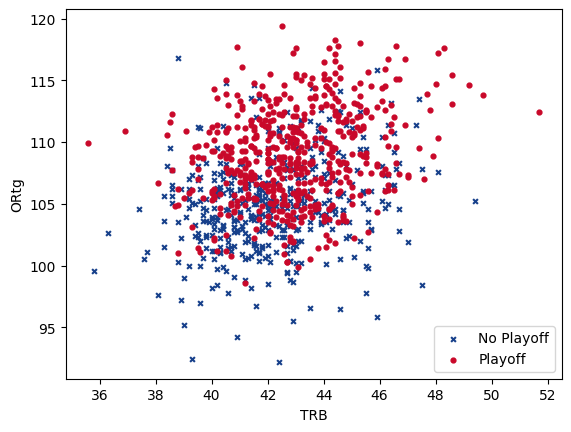

Scatter plot of: TRB and DRtg


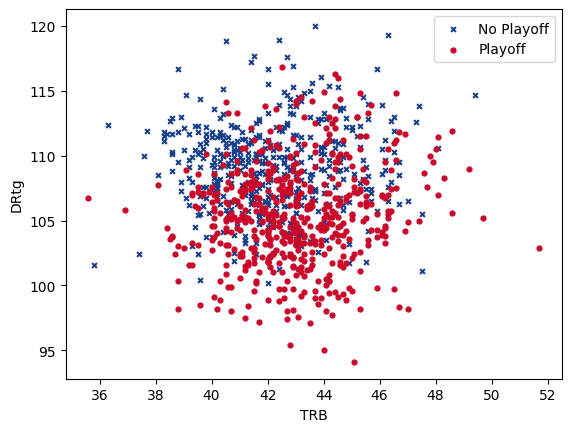

Scatter plot of: TRB and Attend./G


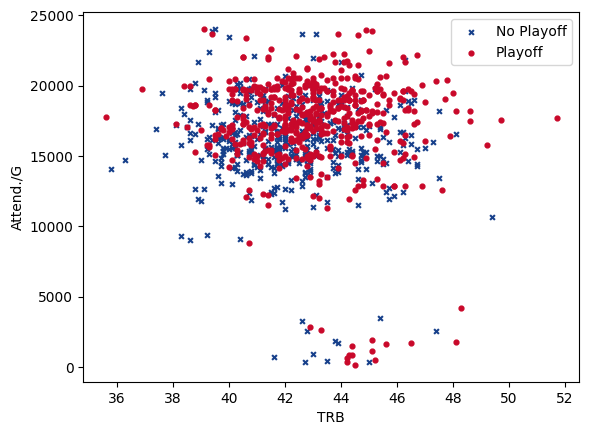

Scatter plot of: TRB and Win %


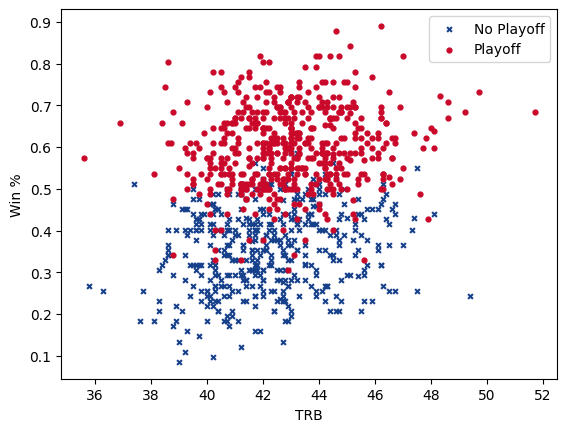

Scatter plot of: AST and STL


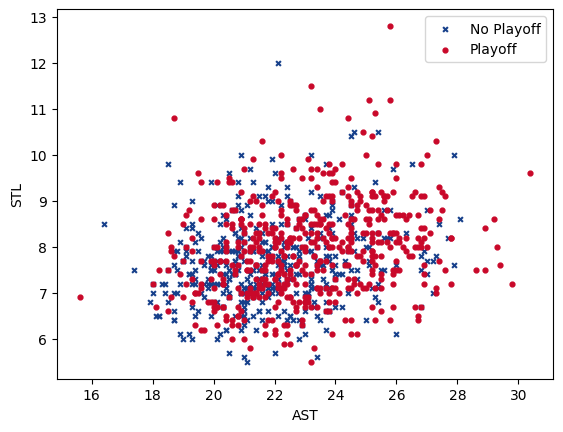

Scatter plot of: AST and BLK


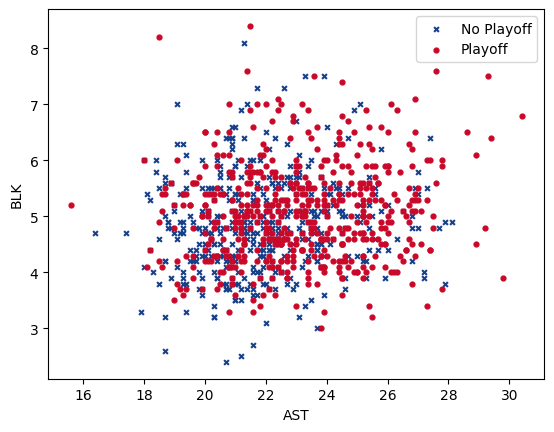

Scatter plot of: AST and TOV


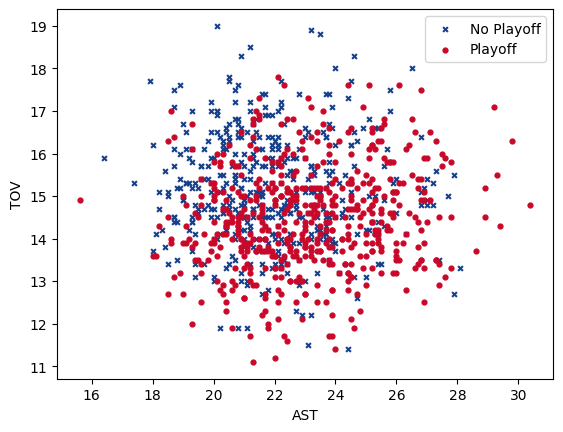

Scatter plot of: AST and PF


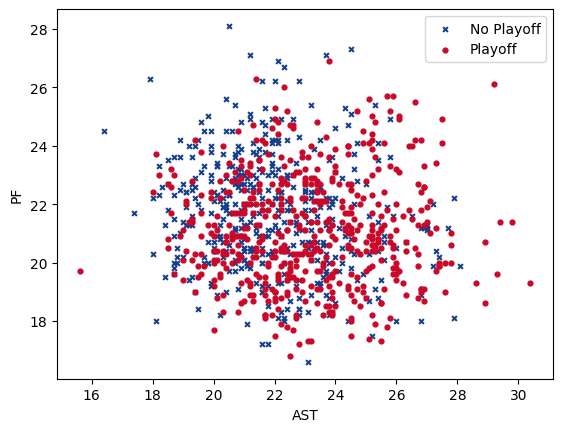

Scatter plot of: AST and PTS


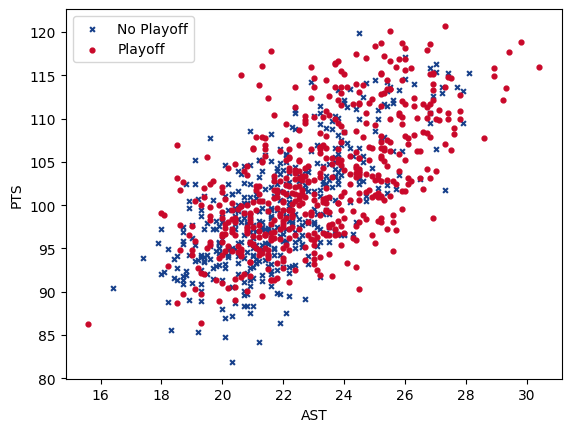

Scatter plot of: AST and SRS


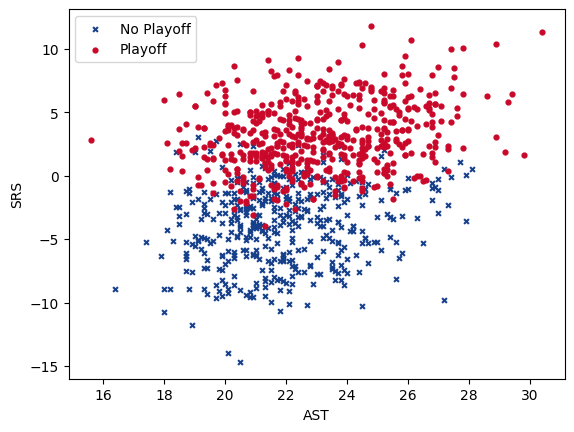

Scatter plot of: AST and ORtg


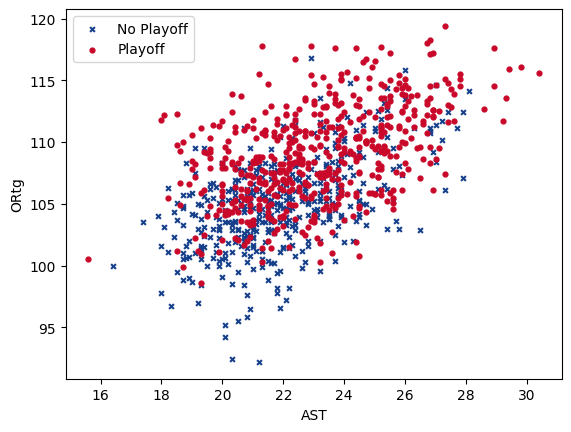

Scatter plot of: AST and DRtg


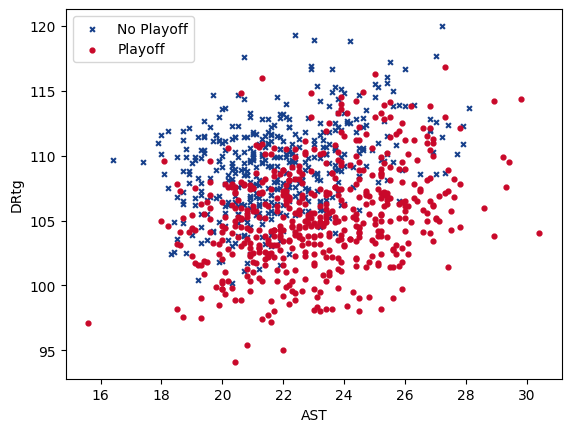

Scatter plot of: AST and Attend./G


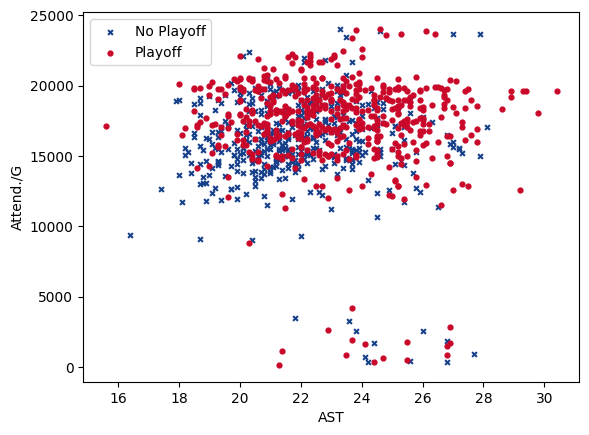

Scatter plot of: AST and Win %


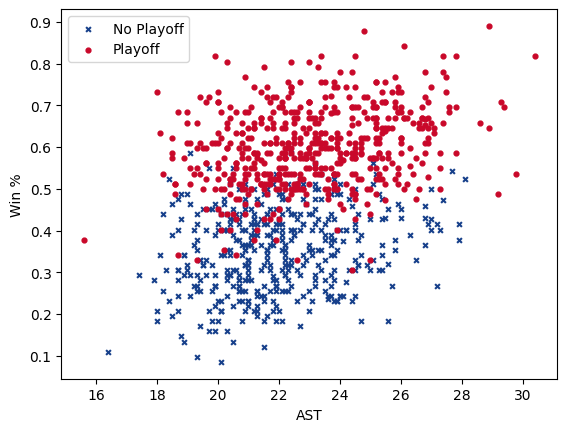

Scatter plot of: STL and BLK


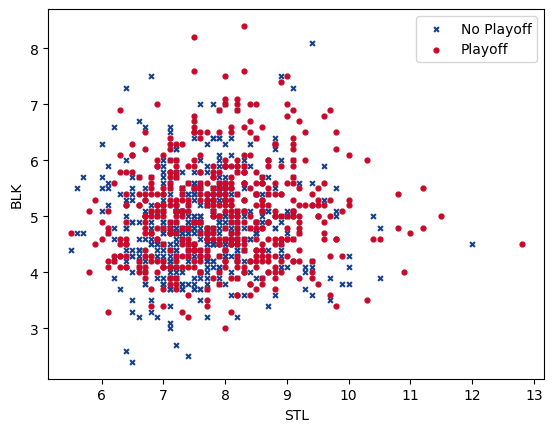

Scatter plot of: STL and TOV


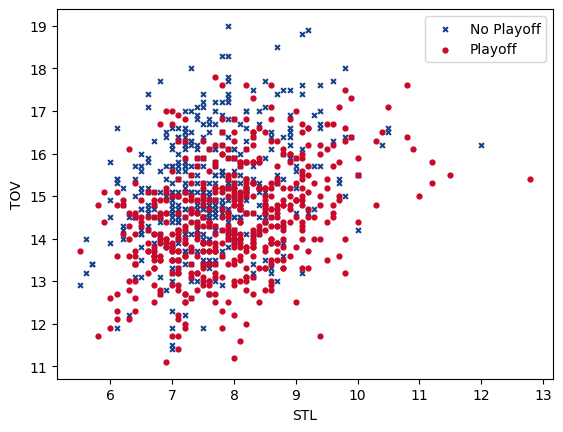

Scatter plot of: STL and PF


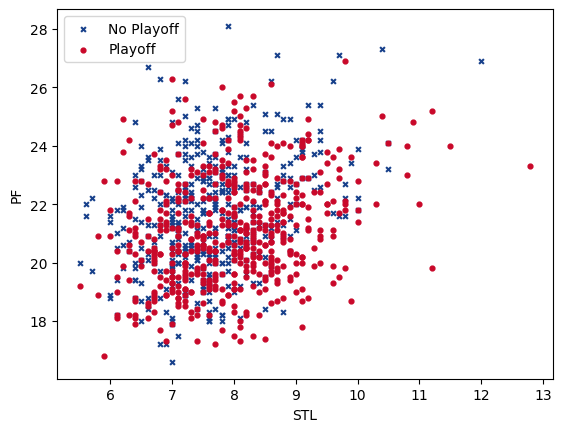

Scatter plot of: STL and PTS


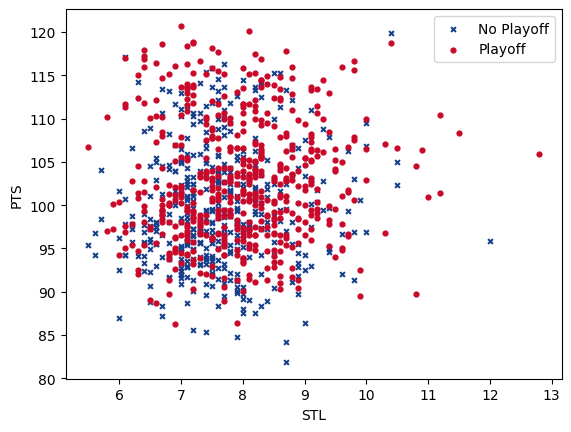

Scatter plot of: STL and SRS


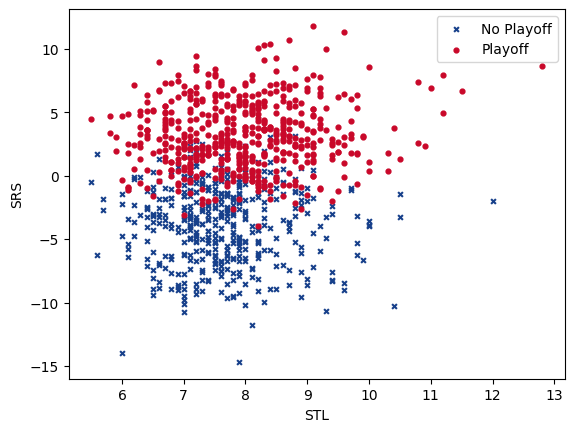

Scatter plot of: STL and ORtg


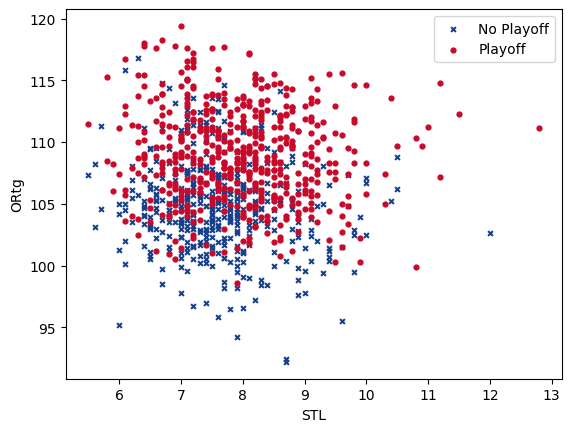

Scatter plot of: STL and DRtg


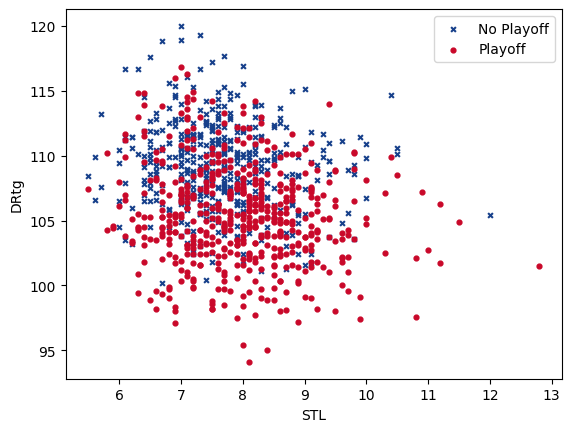

Scatter plot of: STL and Attend./G


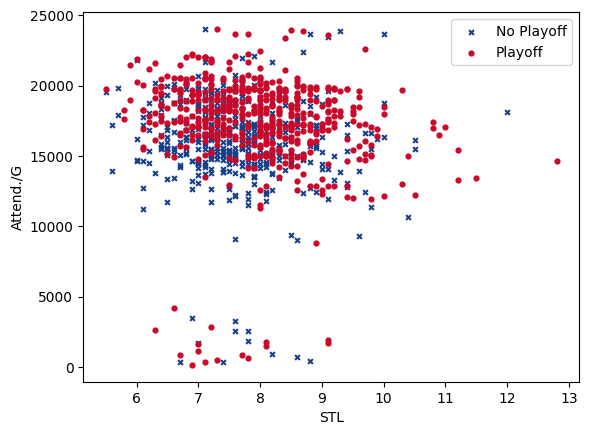

Scatter plot of: STL and Win %


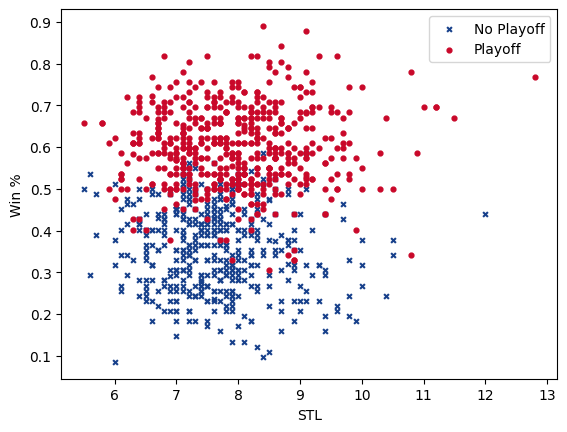

Scatter plot of: BLK and TOV


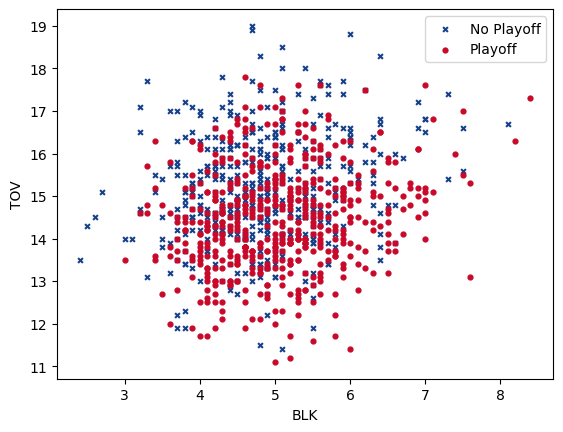

Scatter plot of: BLK and PF


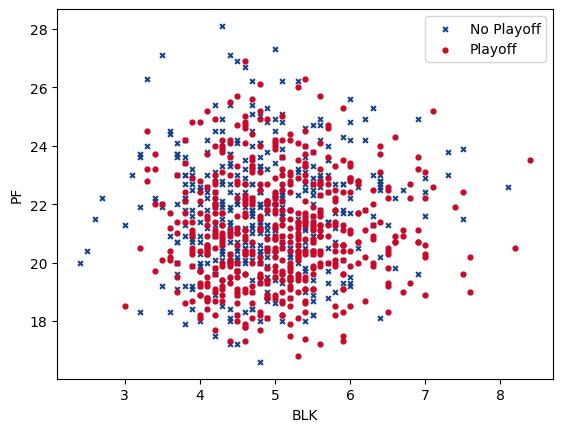

Scatter plot of: BLK and PTS


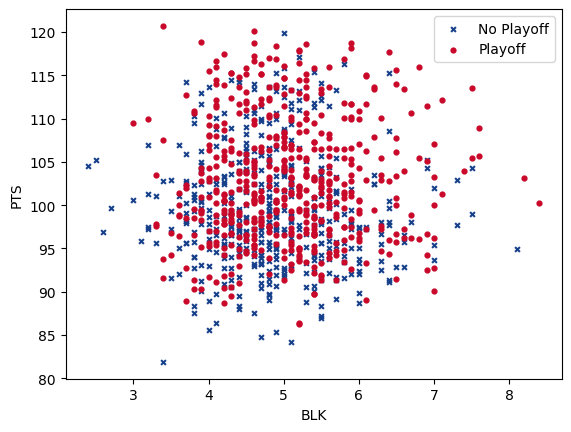

Scatter plot of: BLK and SRS


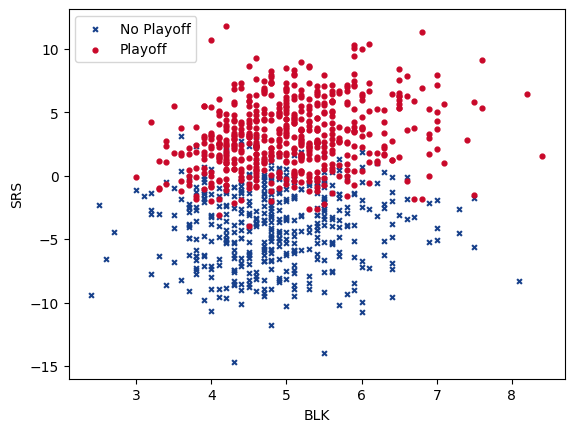

Scatter plot of: BLK and ORtg


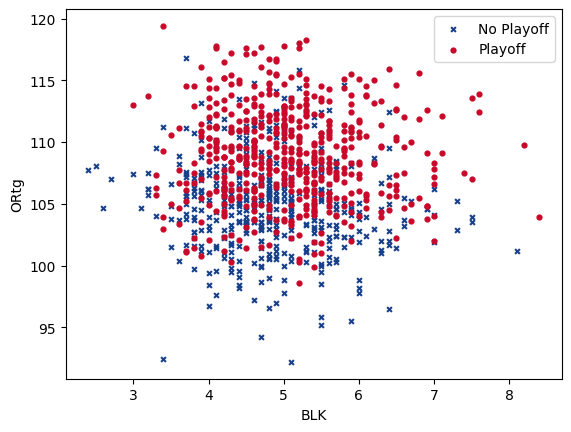

Scatter plot of: BLK and DRtg


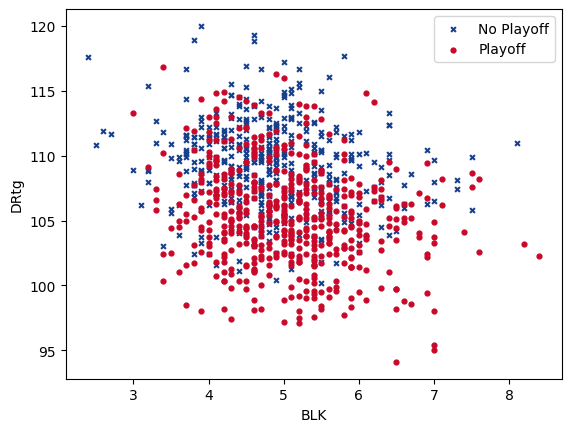

Scatter plot of: BLK and Attend./G


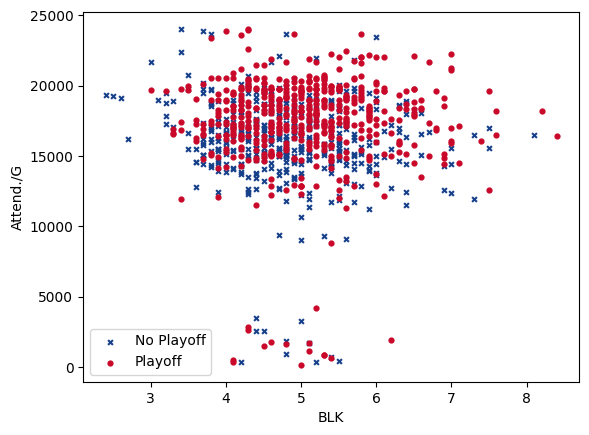

Scatter plot of: BLK and Win %


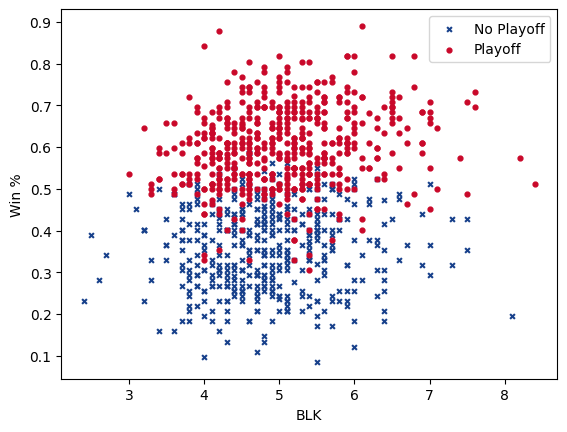

Scatter plot of: TOV and PF


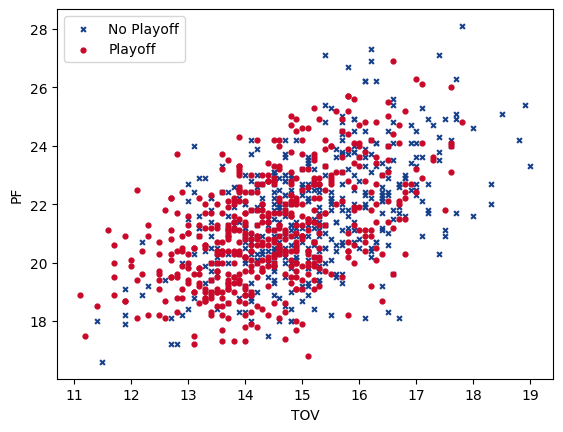

Scatter plot of: TOV and PTS


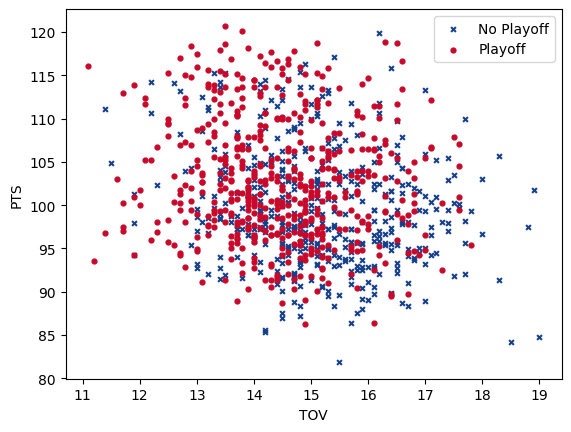

Scatter plot of: TOV and SRS


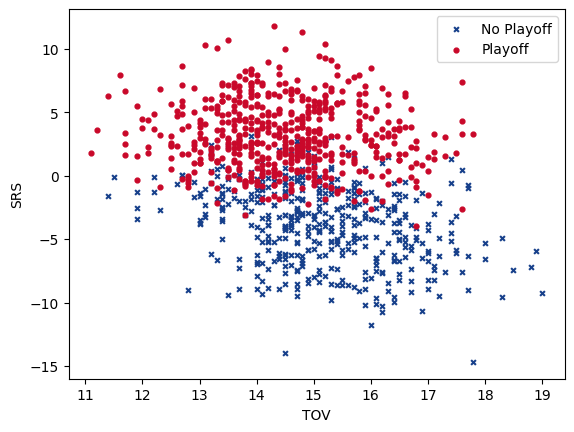

Scatter plot of: TOV and ORtg


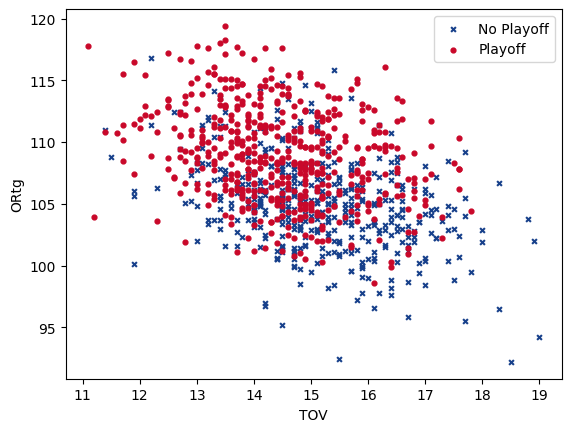

Scatter plot of: TOV and DRtg


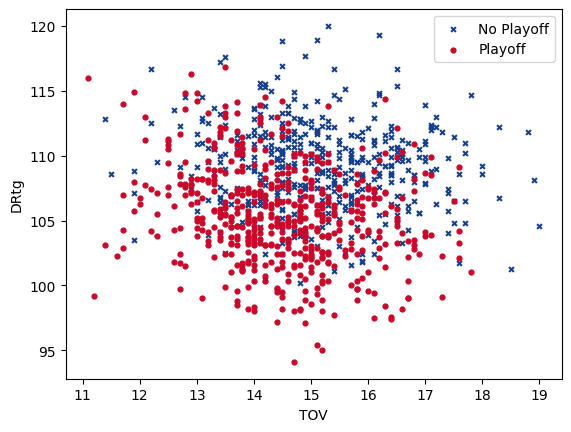

Scatter plot of: TOV and Attend./G


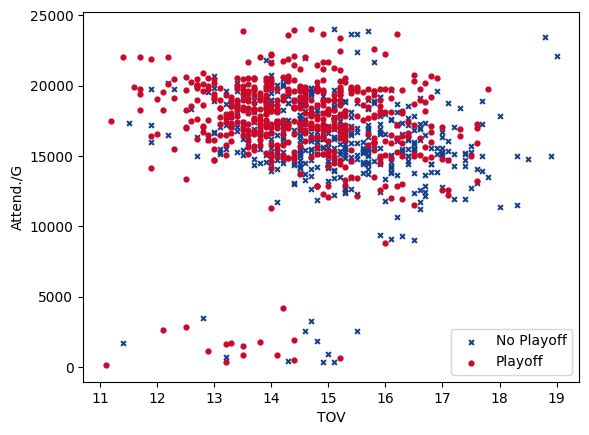

Scatter plot of: TOV and Win %


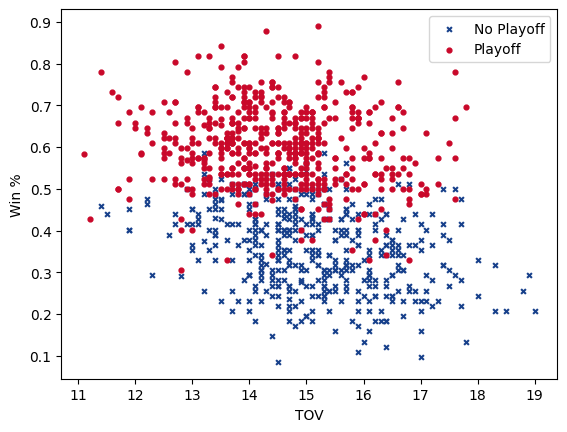

Scatter plot of: PF and PTS


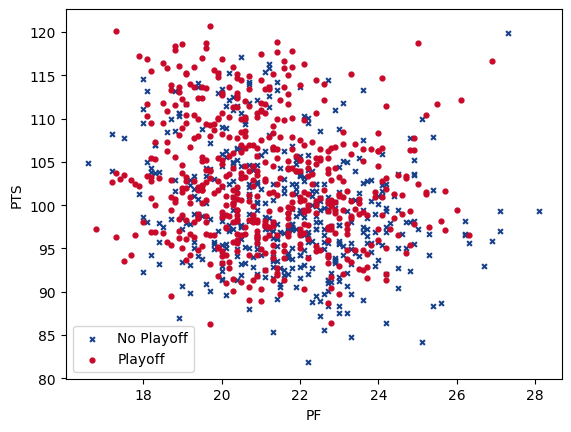

Scatter plot of: PF and SRS


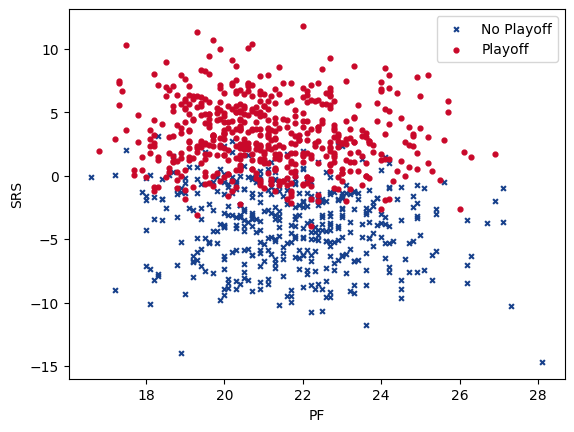

Scatter plot of: PF and ORtg


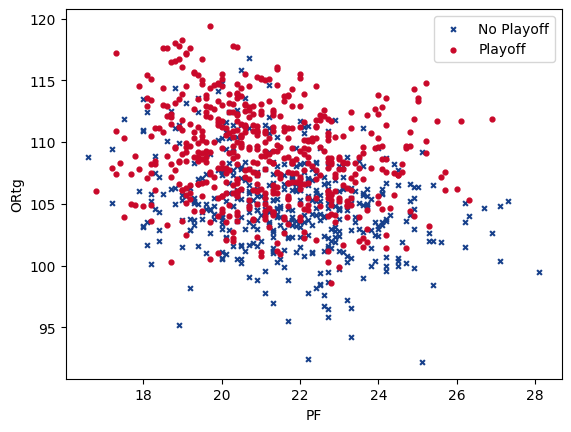

Scatter plot of: PF and DRtg


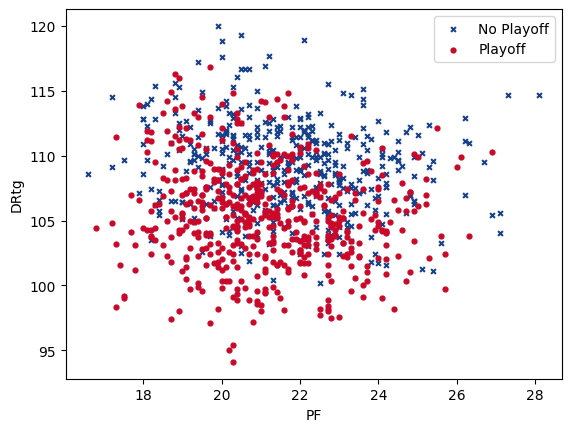

Scatter plot of: PF and Attend./G


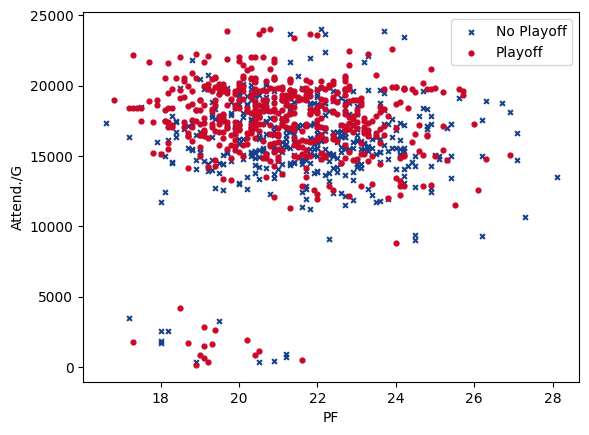

Scatter plot of: PF and Win %


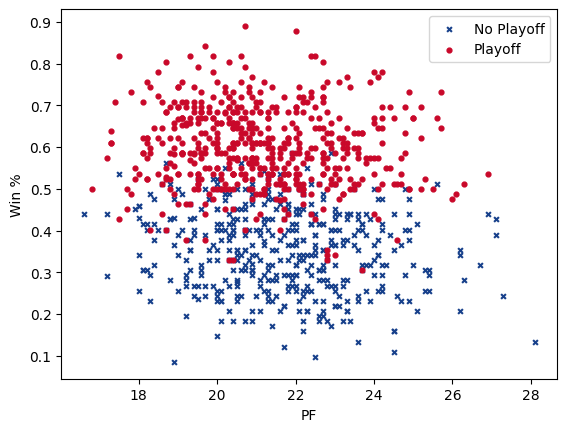

Scatter plot of: PTS and SRS


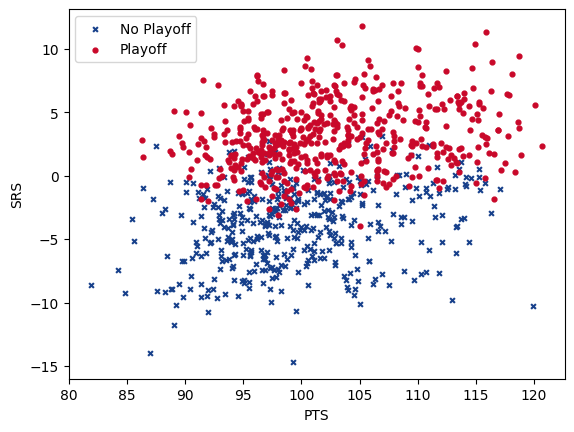

Scatter plot of: PTS and ORtg


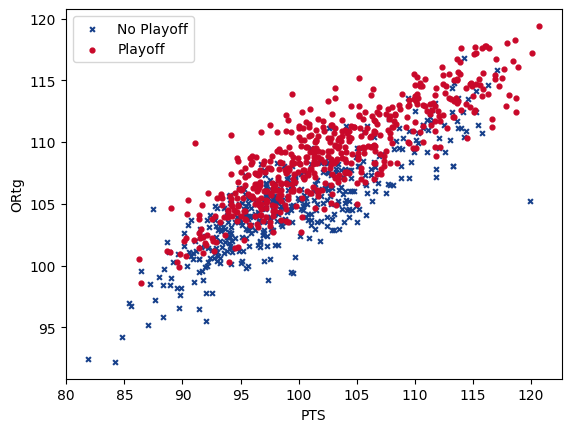

Scatter plot of: PTS and DRtg


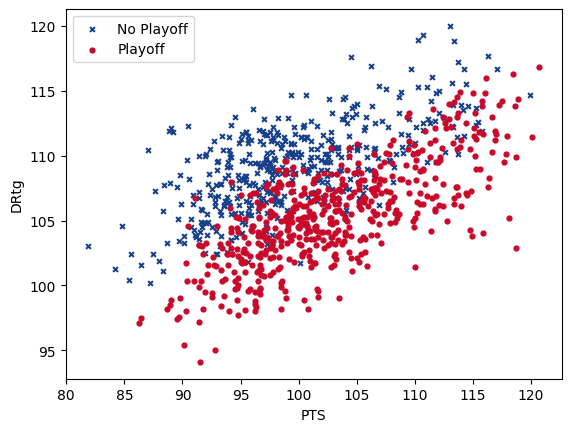

Scatter plot of: PTS and Attend./G


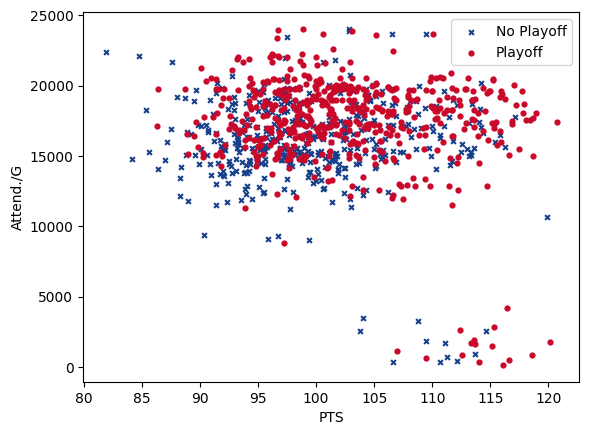

Scatter plot of: PTS and Win %


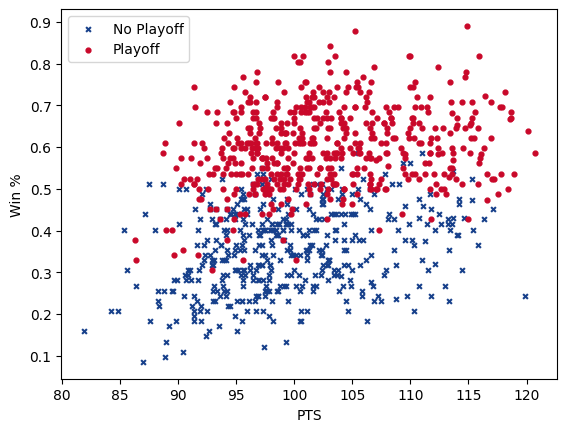

Scatter plot of: SRS and ORtg


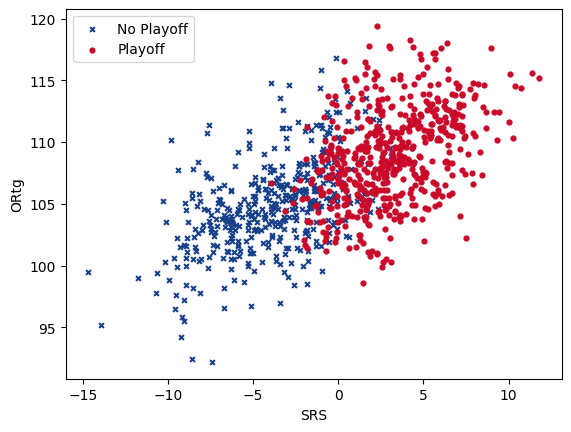

Scatter plot of: SRS and DRtg


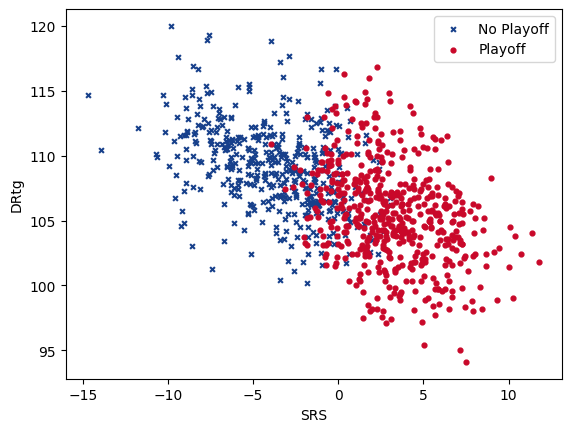

Scatter plot of: SRS and Attend./G


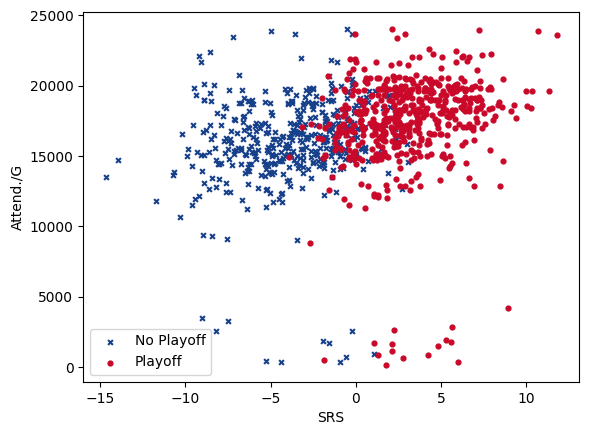

Scatter plot of: SRS and Win %


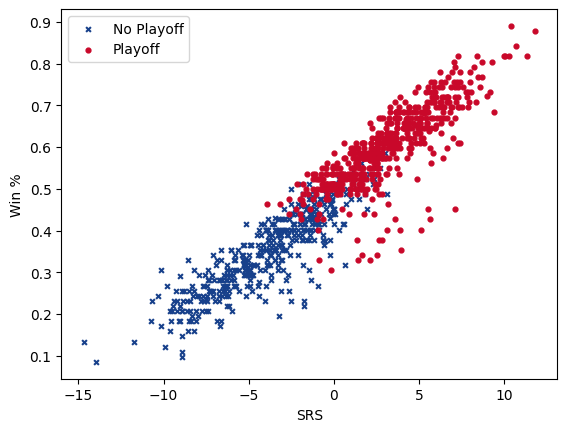

Scatter plot of: ORtg and DRtg


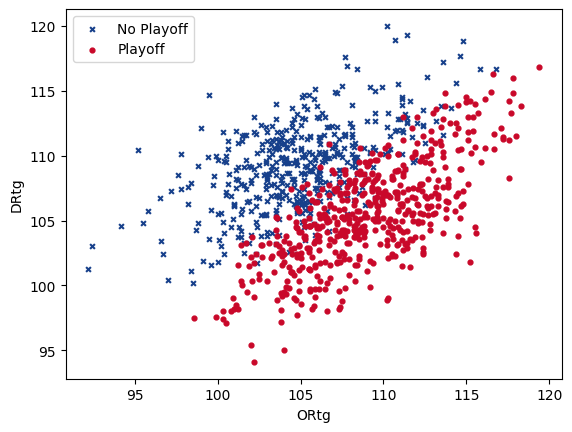

Scatter plot of: ORtg and Attend./G


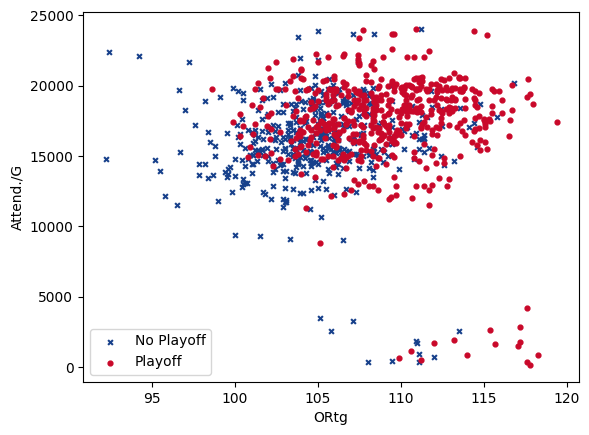

Scatter plot of: ORtg and Win %


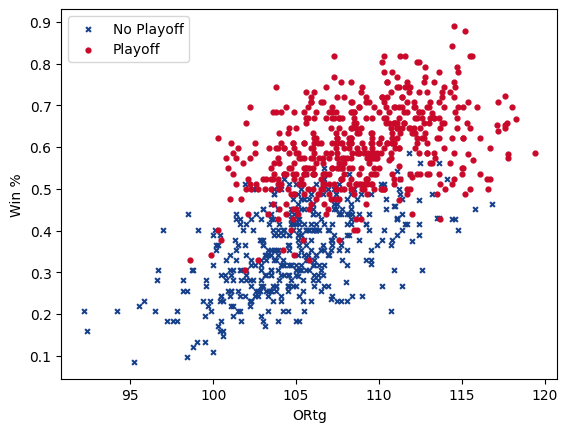

Scatter plot of: DRtg and Attend./G


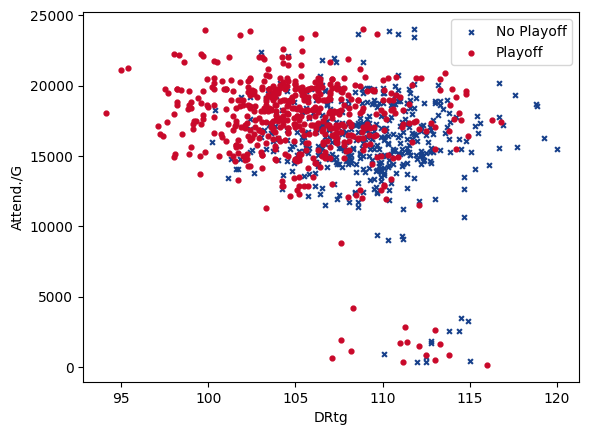

Scatter plot of: DRtg and Win %


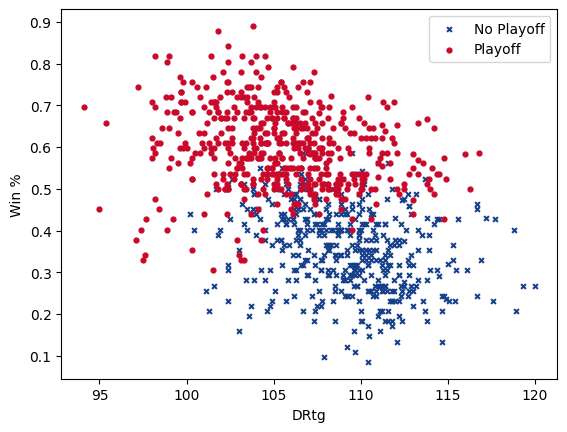

Scatter plot of: Attend./G and Win %


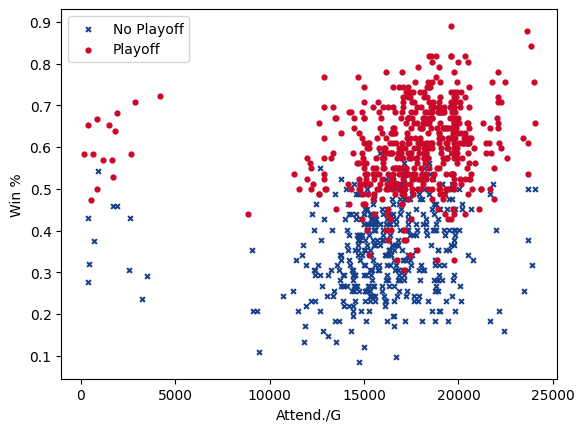

In [56]:
##plot all features with each other
for i in range(1, len(df.columns)-1):
    column = df.columns[i]
    for col in df.columns[i+1:len(df.columns)-1]:
        print(f"Scatter plot of: {column} and {col}")
        plt.scatter(
            df[column][df.Playoff == 0],  # No Playoff
            df[col][df.Playoff == 0],
            c="#17408B",
            s=12,
            marker="x",
            label="No Playoff",
        )
        plt.scatter(
            df[column][df.Playoff == 1],  # Playoff
            df[col][df.Playoff == 1],
            c="#C9082A",
            s=12,
            marker="o",
            label="Playoff",
        )
        plt.xlabel(column)
        plt.ylabel(col)
        plt.legend()
        plt.show()

# 2P% AND ORtg

In [57]:
X = df[["2P%", "ORtg"]].copy()
y = df['Playoff'].copy()
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

print(f"Log Reg Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Log Reg Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Log Reg Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Log Reg Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Log Reg Training Recall Score:{recall_score(y_pred_train, y_train)}")

Index(['2P%', 'ORtg'], dtype='object')
Log Reg Training Accuracy: 0.6306027820710973
Log Reg Training Confusion Matrix: [[ 62  10]
 [229 346]]
Log Reg Training F1 score: 0.7432867883995704
Log Reg Training Precision Score: 0.9719101123595506
Log Reg Training Recall Score:0.6017391304347826


In [58]:
print(f"Log Reg Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Log Reg Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Log Reg Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Log Reg Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Log Reg Testing Recall Score: {recall_score(y_pred, y_test)}")

Log Reg Testing Accuracy: 0.6112852664576802
Log Reg Testing Confusion Matrix: [[ 27   8]
 [116 168]]
Log Reg Testing F1 score: 0.7304347826086957
Log Reg Testing Precision Score: 0.9545454545454546
Log Reg Testing Recall Score: 0.5915492957746479


In [59]:
X = df[["2P%", "ORtg"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = LinearSVC(loss='hinge')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Linear SVC Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Linear SVC Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Linear SVC Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Linear SVC Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Linear SVC Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Linear SVC Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Linear SVC Testing Recall Score:{recall_score(y_pred, y_test)}")

Linear SVC Training Accuracy: 0.5502318392581144
Linear SVC Training Confusion Matrix: [[  0   0]
 [291 356]]
Linear SVC Training F1 score: 0.7098703888334995
Linear SVC Training Precision Score: 1.0
Linear SVC Training Recall Score:0.5502318392581144
Linear SVC Testing Accuracy: 0.5517241379310345
Linear SVC Testing Confusion Matrix: [[  0   0]
 [143 176]]
Linear SVC Testing F1 score: 0.7111111111111111
Linear SVC Testing Precision Score: 1.0
Linear SVC Testing Recall Score:0.5517241379310345


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [60]:
X = df[["2P%", "ORtg"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (poly) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (poly) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (poly) Training Accuracy: 0.7063369397217929
Kernel SVC (poly) Training Confusion Matrix: [[203 102]
 [ 88 254]]
Kernel SVC (poly) Training F1 score: 0.7277936962750715
Kernel SVC (poly) Training Precision Score: 0.7134831460674157
Kernel SVC (poly) Training Recall Score:0.7426900584795322
Kernel SVC (poly) Testing Accuracy: 0.7210031347962382
Kernel SVC (poly) Testing Confusion Matrix: [[101  47]
 [ 42 129]]
Kernel SVC (poly) Testing F1 score: 0.7435158501440922
Kernel SVC (poly) Testing Precision Score: 0.7329545454545454
Kernel SVC (poly) Testing Recall Score:0.7543859649122807


In [61]:
X = df[["2P%", "ORtg"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (rbf) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (rbf) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (rbf) Training Accuracy: 0.6970633693972179
Kernel SVC (rbf) Training Confusion Matrix: [[176  81]
 [115 275]]
Kernel SVC (rbf) Training F1 score: 0.7372654155495978
Kernel SVC (rbf) Training Precision Score: 0.7724719101123596
Kernel SVC (rbf) Training Recall Score:0.7051282051282052
Kernel SVC (rbf) Testing Accuracy: 0.7272727272727273
Kernel SVC (rbf) Testing Confusion Matrix: [[ 93  37]
 [ 50 139]]
Kernel SVC (rbf) Testing F1 score: 0.7616438356164382
Kernel SVC (rbf) Testing Precision Score: 0.7897727272727273
Kernel SVC (rbf) Testing Recall Score:0.7354497354497355


# FG AND DRtg

In [62]:
X = df[["FG%", "DRtg"]].copy()
y = df['Playoff'].copy()
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

print(f"Log Reg Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Log Reg Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Log Reg Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Log Reg Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Log Reg Training Recall Score:{recall_score(y_pred_train, y_train)}")

Index(['FG%', 'DRtg'], dtype='object')
Log Reg Training Accuracy: 0.6877897990726429
Log Reg Training Confusion Matrix: [[117  28]
 [174 328]]
Log Reg Training F1 score: 0.7645687645687645
Log Reg Training Precision Score: 0.9213483146067416
Log Reg Training Recall Score:0.6533864541832669


In [63]:
print(f"Log Reg Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Log Reg Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Log Reg Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Log Reg Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Log Reg Testing Recall Score: {recall_score(y_pred, y_test)}")

Log Reg Testing Accuracy: 0.7147335423197492
Log Reg Testing Confusion Matrix: [[ 70  18]
 [ 73 158]]
Log Reg Testing F1 score: 0.7764127764127765
Log Reg Testing Precision Score: 0.8977272727272727
Log Reg Testing Recall Score: 0.683982683982684


In [64]:
X = df[["FG%", "DRtg"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = LinearSVC(loss='hinge')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Linear SVC Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Linear SVC Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Linear SVC Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Linear SVC Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Linear SVC Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Linear SVC Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Linear SVC Testing Recall Score:{recall_score(y_pred, y_test)}")

Linear SVC Training Accuracy: 0.44976816074188564
Linear SVC Training Confusion Matrix: [[291 356]
 [  0   0]]
Linear SVC Training F1 score: 0.0
Linear SVC Training Precision Score: 0.0
Linear SVC Training Recall Score:0.0
Linear SVC Testing Accuracy: 0.4482758620689655
Linear SVC Testing Confusion Matrix: [[143 176]
 [  0   0]]
Linear SVC Testing F1 score: 0.0
Linear SVC Testing Precision Score: 0.0
Linear SVC Testing Recall Score:0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to n

In [65]:
X = df[["FG%", "DRtg"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (poly) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (poly) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (poly) Training Accuracy: 0.7187017001545595
Kernel SVC (poly) Training Confusion Matrix: [[189  80]
 [102 276]]
Kernel SVC (poly) Training F1 score: 0.7520435967302452
Kernel SVC (poly) Training Precision Score: 0.7752808988764045
Kernel SVC (poly) Training Recall Score:0.7301587301587301
Kernel SVC (poly) Testing Accuracy: 0.7115987460815048
Kernel SVC (poly) Testing Confusion Matrix: [[ 96  45]
 [ 47 131]]
Kernel SVC (poly) Testing F1 score: 0.7401129943502824
Kernel SVC (poly) Testing Precision Score: 0.7443181818181818
Kernel SVC (poly) Testing Recall Score:0.7359550561797753


In [66]:
X = df[["FG%", "DRtg"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (rbf) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (rbf) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (rbf) Training Accuracy: 0.7094281298299846
Kernel SVC (rbf) Training Confusion Matrix: [[172  69]
 [119 287]]
Kernel SVC (rbf) Training F1 score: 0.7532808398950132
Kernel SVC (rbf) Training Precision Score: 0.8061797752808989
Kernel SVC (rbf) Training Recall Score:0.7068965517241379
Kernel SVC (rbf) Testing Accuracy: 0.7147335423197492
Kernel SVC (rbf) Testing Confusion Matrix: [[ 91  39]
 [ 52 137]]
Kernel SVC (rbf) Testing F1 score: 0.7506849315068493
Kernel SVC (rbf) Testing Precision Score: 0.7784090909090909
Kernel SVC (rbf) Testing Recall Score:0.7248677248677249


# SRS AND WIN%

In [67]:
X = df[["SRS", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)


In [68]:
print(f"Log Reg Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Log Reg Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Log Reg Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Log Reg Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Log Reg Training Recall Score:{recall_score(y_pred_train, y_train)}")

Log Reg Training Accuracy: 0.8995363214837713
Log Reg Training Confusion Matrix: [[258  32]
 [ 33 324]]
Log Reg Training F1 score: 0.908835904628331
Log Reg Training Precision Score: 0.9101123595505618
Log Reg Training Recall Score:0.907563025210084


In [69]:
print(f"Log Reg Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Log Reg Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Log Reg Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Log Reg Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Log Reg Testing Recall Score:{recall_score(y_pred, y_test)}")

Log Reg Testing Accuracy: 0.877742946708464
Log Reg Testing Confusion Matrix: [[125  21]
 [ 18 155]]
Log Reg Testing F1 score: 0.8882521489971347
Log Reg Testing Precision Score: 0.8806818181818182
Log Reg Testing Recall Score:0.8959537572254336


In [70]:
X = df[["SRS", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = LinearSVC(loss='hinge')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Linear SVC Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Linear SVC Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Linear SVC Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Linear SVC Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Linear SVC Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Linear SVC Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Linear SVC Testing Recall Score:{recall_score(y_pred, y_test)}")

Linear SVC Training Accuracy: 0.9026275115919629
Linear SVC Training Confusion Matrix: [[259  31]
 [ 32 325]]
Linear SVC Training F1 score: 0.9116409537166901
Linear SVC Training Precision Score: 0.9129213483146067
Linear SVC Training Recall Score:0.9103641456582633
Linear SVC Testing Accuracy: 0.890282131661442
Linear SVC Testing Confusion Matrix: [[125  17]
 [ 18 159]]
Linear SVC Testing F1 score: 0.9008498583569404
Linear SVC Testing Precision Score: 0.9034090909090909
Linear SVC Testing Recall Score:0.8983050847457628


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [71]:
X = df[["SRS", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (poly) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (poly) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (poly) Training Accuracy: 0.8531684698608965
Kernel SVC (poly) Training Confusion Matrix: [[199   3]
 [ 92 353]]
Kernel SVC (poly) Training F1 score: 0.8813982521847691
Kernel SVC (poly) Training Precision Score: 0.9915730337078652
Kernel SVC (poly) Training Recall Score:0.7932584269662921
Kernel SVC (poly) Testing Accuracy: 0.8432601880877743
Kernel SVC (poly) Testing Confusion Matrix: [[ 99   6]
 [ 44 170]]
Kernel SVC (poly) Testing F1 score: 0.8717948717948717
Kernel SVC (poly) Testing Precision Score: 0.9659090909090909
Kernel SVC (poly) Testing Recall Score:0.794392523364486


In [72]:
X = df[["SRS", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (rbf) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (rbf) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (rbf) Training Accuracy: 0.8918083462132921
Kernel SVC (rbf) Training Confusion Matrix: [[250  29]
 [ 41 327]]
Kernel SVC (rbf) Training F1 score: 0.9033149171270719
Kernel SVC (rbf) Training Precision Score: 0.9185393258426966
Kernel SVC (rbf) Training Recall Score:0.8885869565217391
Kernel SVC (rbf) Testing Accuracy: 0.8840125391849529
Kernel SVC (rbf) Testing Confusion Matrix: [[121  15]
 [ 22 161]]
Kernel SVC (rbf) Testing F1 score: 0.8969359331476322
Kernel SVC (rbf) Testing Precision Score: 0.9147727272727273
Kernel SVC (rbf) Testing Recall Score:0.8797814207650273


# SRS AND FG%

In [73]:
X = df[["SRS", "FG%"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

In [74]:
print(f"Log Reg Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Log Reg Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Log Reg Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Log Reg Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Log Reg Training Recall Score:{recall_score(y_pred_train, y_train)}")

Log Reg Training Accuracy: 0.8918083462132921
Log Reg Training Confusion Matrix: [[255  34]
 [ 36 322]]
Log Reg Training F1 score: 0.9019607843137254
Log Reg Training Precision Score: 0.9044943820224719
Log Reg Training Recall Score:0.8994413407821229


In [75]:
print(f"Log Reg Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Log Reg Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Log Reg Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Log Reg Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Log Reg Testing Recall Score:{recall_score(y_pred, y_test)}")

Log Reg Testing Accuracy: 0.8746081504702194
Log Reg Testing Confusion Matrix: [[125  22]
 [ 18 154]]
Log Reg Testing F1 score: 0.8850574712643678
Log Reg Testing Precision Score: 0.875
Log Reg Testing Recall Score:0.8953488372093024


In [76]:
X = df[["SRS", "FG%"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = LinearSVC(loss='hinge')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Linear SVC Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Linear SVC Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Linear SVC Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Linear SVC Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Linear SVC Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Linear SVC Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Linear SVC Testing Recall Score:{recall_score(y_pred, y_test)}")

Linear SVC Training Accuracy: 0.893353941267388
Linear SVC Training Confusion Matrix: [[256  34]
 [ 35 322]]
Linear SVC Training F1 score: 0.9032258064516129
Linear SVC Training Precision Score: 0.9044943820224719
Linear SVC Training Recall Score:0.9019607843137255
Linear SVC Testing Accuracy: 0.877742946708464
Linear SVC Testing Confusion Matrix: [[126  22]
 [ 17 154]]
Linear SVC Testing F1 score: 0.8876080691642652
Linear SVC Testing Precision Score: 0.875
Linear SVC Testing Recall Score:0.9005847953216374


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [77]:
X = df[["SRS", "FG%"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (poly) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (poly) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (poly) Training Accuracy: 0.8547140649149922
Kernel SVC (poly) Training Confusion Matrix: [[200   3]
 [ 91 353]]
Kernel SVC (poly) Training F1 score: 0.8825000000000001
Kernel SVC (poly) Training Precision Score: 0.9915730337078652
Kernel SVC (poly) Training Recall Score:0.795045045045045
Kernel SVC (poly) Testing Accuracy: 0.8432601880877743
Kernel SVC (poly) Testing Confusion Matrix: [[ 99   6]
 [ 44 170]]
Kernel SVC (poly) Testing F1 score: 0.8717948717948717
Kernel SVC (poly) Testing Precision Score: 0.9659090909090909
Kernel SVC (poly) Testing Recall Score:0.794392523364486


In [78]:
X = df[["SRS", "FG%"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (rbf) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (rbf) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (rbf) Training Accuracy: 0.8918083462132921
Kernel SVC (rbf) Training Confusion Matrix: [[250  29]
 [ 41 327]]
Kernel SVC (rbf) Training F1 score: 0.9033149171270719
Kernel SVC (rbf) Training Precision Score: 0.9185393258426966
Kernel SVC (rbf) Training Recall Score:0.8885869565217391
Kernel SVC (rbf) Testing Accuracy: 0.8808777429467085
Kernel SVC (rbf) Testing Confusion Matrix: [[120  15]
 [ 23 161]]
Kernel SVC (rbf) Testing F1 score: 0.8944444444444444
Kernel SVC (rbf) Testing Precision Score: 0.9147727272727273
Kernel SVC (rbf) Testing Recall Score:0.875


# FG% AND WIN%

In [79]:
X = df[["FG%", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

In [80]:
print(f"Log Reg Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Log Reg Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Log Reg Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Log Reg Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Log Reg Training Recall Score:{recall_score(y_pred_train, y_train)}")

Log Reg Training Accuracy: 0.9119010819165378
Log Reg Training Confusion Matrix: [[252  18]
 [ 39 338]]
Log Reg Training F1 score: 0.922237380627558
Log Reg Training Precision Score: 0.949438202247191
Log Reg Training Recall Score:0.896551724137931


In [81]:
print(f"Log Reg Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Log Reg Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Log Reg Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Log Reg Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Log Reg Testing Recall Score:{recall_score(y_pred, y_test)}")

Log Reg Testing Accuracy: 0.8871473354231975
Log Reg Testing Confusion Matrix: [[124  17]
 [ 19 159]]
Log Reg Testing F1 score: 0.8983050847457628
Log Reg Testing Precision Score: 0.9034090909090909
Log Reg Testing Recall Score:0.8932584269662921


In [82]:
X = df[["FG%", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = LinearSVC(loss='hinge')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Linear SVC Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Linear SVC Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Linear SVC Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Linear SVC Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Linear SVC Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Linear SVC Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Linear SVC Testing Recall Score:{recall_score(y_pred, y_test)}")

Linear SVC Training Accuracy: 0.9119010819165378
Linear SVC Training Confusion Matrix: [[252  18]
 [ 39 338]]
Linear SVC Training F1 score: 0.922237380627558
Linear SVC Training Precision Score: 0.949438202247191
Linear SVC Training Recall Score:0.896551724137931
Linear SVC Testing Accuracy: 0.8871473354231975
Linear SVC Testing Confusion Matrix: [[124  17]
 [ 19 159]]
Linear SVC Testing F1 score: 0.8983050847457628
Linear SVC Testing Precision Score: 0.9034090909090909
Linear SVC Testing Recall Score:0.8932584269662921


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [83]:
X = df[["FG%", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (poly) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (poly) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (poly) Training Accuracy: 0.9211746522411128
Kernel SVC (poly) Training Confusion Matrix: [[265  25]
 [ 26 331]]
Kernel SVC (poly) Training F1 score: 0.9284712482468443
Kernel SVC (poly) Training Precision Score: 0.9297752808988764
Kernel SVC (poly) Training Recall Score:0.927170868347339
Kernel SVC (poly) Testing Accuracy: 0.8808777429467085
Kernel SVC (poly) Testing Confusion Matrix: [[127  22]
 [ 16 154]]
Kernel SVC (poly) Testing F1 score: 0.8901734104046243
Kernel SVC (poly) Testing Precision Score: 0.875
Kernel SVC (poly) Testing Recall Score:0.9058823529411765


In [84]:
X = df[["FG%", "Win %"]].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (rbf) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (rbf) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (rbf) Training Accuracy: 0.9211746522411128
Kernel SVC (rbf) Training Confusion Matrix: [[263  23]
 [ 28 333]]
Kernel SVC (rbf) Training F1 score: 0.9288702928870293
Kernel SVC (rbf) Training Precision Score: 0.9353932584269663
Kernel SVC (rbf) Training Recall Score:0.9224376731301939
Kernel SVC (rbf) Testing Accuracy: 0.8840125391849529
Kernel SVC (rbf) Testing Confusion Matrix: [[125  19]
 [ 18 157]]
Kernel SVC (rbf) Testing F1 score: 0.8945868945868946
Kernel SVC (rbf) Testing Precision Score: 0.8920454545454546
Kernel SVC (rbf) Testing Recall Score:0.8971428571428571


# ALL COLUMNS

In [85]:
X = df[['FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS', 'SRS', 'ORtg', 'DRtg', 'Win %']].copy()
y = df['Playoff'].copy()
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

print(f"Log Reg Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Log Reg Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Log Reg Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Log Reg Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Log Reg Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Log Reg Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Log Reg Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Log Reg Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Log Reg Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Log Reg Testing Recall Score: {recall_score(y_pred, y_test)}")

Index(['FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'SRS', 'ORtg', 'DRtg', 'Win %'],
      dtype='object')
Log Reg Training Accuracy: 0.9242658423493045
Log Reg Training Confusion Matrix: [[264  22]
 [ 27 334]]
Log Reg Training F1 score: 0.9316596931659693
Log Reg Training Precision Score: 0.9382022471910112
Log Reg Training Recall Score:0.925207756232687
Log Reg Testing Accuracy: 0.8996865203761756
Log Reg Testing Confusion Matrix: [[128  17]
 [ 15 159]]
Log Reg Testing F1 score: 0.9085714285714287
Log Reg Testing Precision Score: 0.9034090909090909
Log Reg Testing Recall Score: 0.9137931034482759


In [86]:
X = df[['FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS', 'SRS', 'ORtg', 'DRtg', 'Win %']].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = LinearSVC(loss='hinge')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Linear SVC Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Linear SVC Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Linear SVC Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Linear SVC Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Linear SVC Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Linear SVC Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Linear SVC Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Linear SVC Testing Recall Score:{recall_score(y_pred, y_test)}")

Linear SVC Training Accuracy: 0.7372488408037094
Linear SVC Training Confusion Matrix: [[291 170]
 [  0 186]]
Linear SVC Training F1 score: 0.6863468634686347
Linear SVC Training Precision Score: 0.5224719101123596
Linear SVC Training Recall Score:1.0
Linear SVC Testing Accuracy: 0.7460815047021944
Linear SVC Testing Confusion Matrix: [[143  81]
 [  0  95]]
Linear SVC Testing F1 score: 0.7011070110701108
Linear SVC Testing Precision Score: 0.5397727272727273
Linear SVC Testing Recall Score:1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [87]:
X = df[['FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS', 'SRS', 'ORtg', 'DRtg', 'Win %']].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (poly) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (poly) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (poly) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (poly) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (poly) Training Accuracy: 0.9026275115919629
Kernel SVC (poly) Training Confusion Matrix: [[245  17]
 [ 46 339]]
Kernel SVC (poly) Training F1 score: 0.9149797570850202
Kernel SVC (poly) Training Precision Score: 0.952247191011236
Kernel SVC (poly) Training Recall Score:0.8805194805194805
Kernel SVC (poly) Testing Accuracy: 0.877742946708464
Kernel SVC (poly) Testing Confusion Matrix: [[116  12]
 [ 27 164]]
Kernel SVC (poly) Testing F1 score: 0.8937329700272478
Kernel SVC (poly) Testing Precision Score: 0.9318181818181818
Kernel SVC (poly) Testing Recall Score:0.8586387434554974


In [88]:
X = df[['FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS', 'SRS', 'ORtg', 'DRtg', 'Win %']].copy()
y = df['Playoff'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print(f"Kernel SVC (rbf) Training Accuracy: {accuracy_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Confusion Matrix: {confusion_matrix(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training F1 score: {f1_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Precision Score: {precision_score(y_pred_train, y_train)}")
print(f"Kernel SVC (rbf) Training Recall Score:{recall_score(y_pred_train, y_train)}")

print(f"Kernel SVC (rbf) Testing Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Confusion Matrix: {confusion_matrix(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing F1 score: {f1_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Precision Score: {precision_score(y_pred, y_test)}")
print(f"Kernel SVC (rbf) Testing Recall Score:{recall_score(y_pred, y_test)}")

Kernel SVC (rbf) Training Accuracy: 0.884080370942813
Kernel SVC (rbf) Training Confusion Matrix: [[225   9]
 [ 66 347]]
Kernel SVC (rbf) Training F1 score: 0.9024707412223667
Kernel SVC (rbf) Training Precision Score: 0.9747191011235955
Kernel SVC (rbf) Training Recall Score:0.8401937046004843
Kernel SVC (rbf) Testing Accuracy: 0.8620689655172413
Kernel SVC (rbf) Testing Confusion Matrix: [[110  11]
 [ 33 165]]
Kernel SVC (rbf) Testing F1 score: 0.8823529411764706
Kernel SVC (rbf) Testing Precision Score: 0.9375
Kernel SVC (rbf) Testing Recall Score:0.8333333333333334
